# Exploratory Data Analysis Strategy

## Objective
To understand the distribution of each column in `client_data.csv` and `price_data.csv`, analyze the percentage and frequency of churned clients (`churn` = 1) versus non-churned clients (`churn` = 0) for each column using stacked visualizations, and investigate why clients with `margin_gross_pow_ele` in the top 10% percentile have high gross margins.

## Strategy
1. **Data Overview**: Confirm data types, identify numerical, categorical, and date columns.
2. **Missing Values**: Check for missing or invalid data and handle appropriately.
3. **Numerical Columns**: Visualize distributions with stacked histograms for both churn percentages and frequencies.
4. **Categorical Columns**: Analyze frequency distributions with stacked bar plots for both churn percentages and frequencies.
5. **Date Columns**: Convert to datetime, extract features (e.g., year), and visualize churn trends with stacked bar plots for percentages and frequencies.
6. **Price Data**: Aggregate `price_df` to client-level metrics and visualize distributions with churn percentages and frequencies.
7. **Correlation Analysis**: Explore correlations between numerical features and churn.
8. **Top 10% Margin Analysis**: Identify rows with `margin_gross_pow_ele` in the top 10% percentile and analyze contributing factors with both percentage and frequency plots.
9. **Visualizations**: Use stacked histograms or bar plots to highlight churn vs. non-churn distributions for both percentages and frequencies.

## Import Packages

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Shows plots in jupyter notebook
%matplotlib inline

# Set plot style
sns.set(color_codes=True)

---

## Loading Data with Pandas

Load `client_data.csv` and `price_data.csv` into dataframes. Ensure the CSV files are in the same directory as the notebook or adjust the file path accordingly.

In [5]:
client_df = pd.read_csv('./client_data.csv')
price_df = pd.read_csv('./price_data.csv')

View the first 3 rows of each dataframe to understand their structure.

In [6]:
client_df.head(3)

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   

  date_modif_prod date_renewal  forecast_cons_12m  ...  has_gas  imp_cons  \
0      2015-11-01   2015-06-23               0.00  ...        t       0.0   
1      2009-08-21   2015-08-31             189.95  ...        f       0.0   
2      2010-04-16   2015-04-17              47.96  ...        f       0.0   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   

  num_years_antig                         origin_up  pow_max  churn  
0               3  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2               6  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  

[3 rows x 26 columns]

In [7]:
price_df.head(3)

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0

---

## Descriptive Statistics of Data

### Data Types

Use `info()` to check data types and identify numerical, categorical, and date columns.

In [8]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [9]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Use `describe()` to get statistical summaries of numerical columns.

In [10]:
client_df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak      imp_cons  margin_gross_pow_ele  \
count                 14606.000000  14606.000000          14606.000000   
mean                     43.130056    152.786896             24.565121   
std                       4.485988    341.369366             20.231172   
min                       0.000000      0.000000              0.000000   
25%                      40.606701      0.000000             14.280000   
50%                      44.311378     37.395000             21.640000   
75%                      44.311378    193.980000             29.880000   
max                      59.266378  15042.790000            374.640000   

       margin_net_pow_ele   nb_prod_act    net_margin  num_years_antig  \
count        14606.000000  14606.000000  14606.000000     14606.000000   
mean            24.562517      1.292346    189.264522         4.997809   
std             20.230280      0.709774    311.798130         1.611749   
min              0.000000      1.000000      0.000000         1.000000   
25%             14.280000      1.000000     50.712500         4.000000   
50%             21.640000      1.000000    112.530000         5.000000   
75%             29.880000      1.000000    243.097500         6.000000   
max            374.640000     32.000000  24570.650000        13.000000   

            pow_max         churn  
count  14606.000000  14606.000000  
mean      18.135136      0.097152  
std       13.534743      0.296175  
min        3.300000      0.000000  
25%       12.500000      0.000000  
50%       13.856000      0.000000  
75%       19.172500      0.000000  
max      320.000000      1.000000

In [11]:
price_df.describe()

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

---

## Missing Values

Check for missing values in both dataframes.

In [12]:
# Check missing values in client_df
print('Missing values in client_df:')
print(client_df.isnull().sum())

# Check missing values in price_df
print('\nMissing values in price_df:')
print(price_df.isnull().sum())

Missing values in client_df:
id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

Missing values in pri

No missing values are present based on `info()`. If any are found, consider imputation (e.g., median for numerical, mode for categorical) or removal, depending on the extent.

---

## Define Visualization Function

Define a `plot_distribution` function to visualize distributions with either churn percentages or frequencies.

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_distribution(df, column, ax, bins=50, is_categorical=False, use_percentage=True):
    """
    Plot distribution of a column with stacked churn percentages or frequencies, with percentage labels for categorical data.
    
    Parameters:
    - df: DataFrame containing the data
    - column: Column name to analyze
    - ax: Matplotlib axis for plotting
    - bins: Number of bins for numerical columns (default=50)
    - is_categorical: If True, treat as categorical (default=False)
    - use_percentage: If True, plot percentages; if False, plot frequencies (default=True)
    """
    if is_categorical:
        # For categorical columns, compute churn counts
        churn_counts = df.groupby([column, 'churn']).size().unstack(fill_value=0)
        # Ensure both churn values (0 and 1) exist in columns
        for churn_val in [0, 1]:
            if churn_val not in churn_counts.columns:
                churn_counts[churn_val] = 0
        if use_percentage:
            # Calculate percentages
            churn_values = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
            ylabel = 'Percentage'
            title = f'Distribution of {column} with Churn Percentages'
        else:
            # Use raw counts
            churn_values = churn_counts
            ylabel = 'Frequency'
            title = f'Distribution of {column} with Churn Frequencies'
        
        # Plot stacked bar plot
        churn_values.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
        
        # Add percentage labels for categorical data when use_percentage=True
        if use_percentage:
            # Get the number of categories and churn values
            num_categories = len(churn_values)
            num_stacks = len(churn_values.columns)
            for i, patch in enumerate(ax.patches):
                # Get the height and position of the patch
                height = patch.get_height()
                if height > 0:  # Only add labels for non-zero heights
                    x = patch.get_x() + patch.get_width() / 2
                    y = patch.get_y() + height / 2
                    # Calculate bar and stack indices
                    bar_idx = i % num_categories  # Which category
                    stack_idx = i // num_categories  # Which churn value
                    if stack_idx < num_stacks:  # Ensure stack_idx is valid
                        value = churn_values.iloc[bar_idx, stack_idx]
                        ax.text(x, y, f'{value:.1f}%', ha='center', va='center', fontsize=8, color='white')
        
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.set_ylabel(ylabel)
        ax.legend(['Non-Churned (0)', 'Churned (1)'])
    else:
        # For numerical columns, bin the data
        df['bin'] = pd.cut(df[column], bins=bins)
        # Compute churn counts for each bin
        churn_counts = df.groupby(['bin', 'churn'], observed=True).size().unstack(fill_value=0)
        if use_percentage:
            # Calculate percentages
            churn_values = churn_counts.div(churn_counts.sum(axis=1), axis=0) * 100
            ylabel = 'Percentage'
            title = f'Distribution of {column} with Churn Percentages'
        else:
            # Use raw counts
            churn_values = churn_counts
            ylabel = 'Frequency'
            title = f'Distribution of {column} with Churn Frequencies'
        
        # Plot stacked bar plot for binned data
        churn_values.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])
        ax.set_title(title)
        ax.set_xlabel(f'{column} (Binned)')
        ax.set_ylabel(ylabel)
        ax.legend(['Non-Churned (0)', 'Churned (1)'])
        ax.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()

---

## Numerical Columns Analysis

Analyze the distribution of numerical columns in `client_df` with both churn percentages and frequencies.

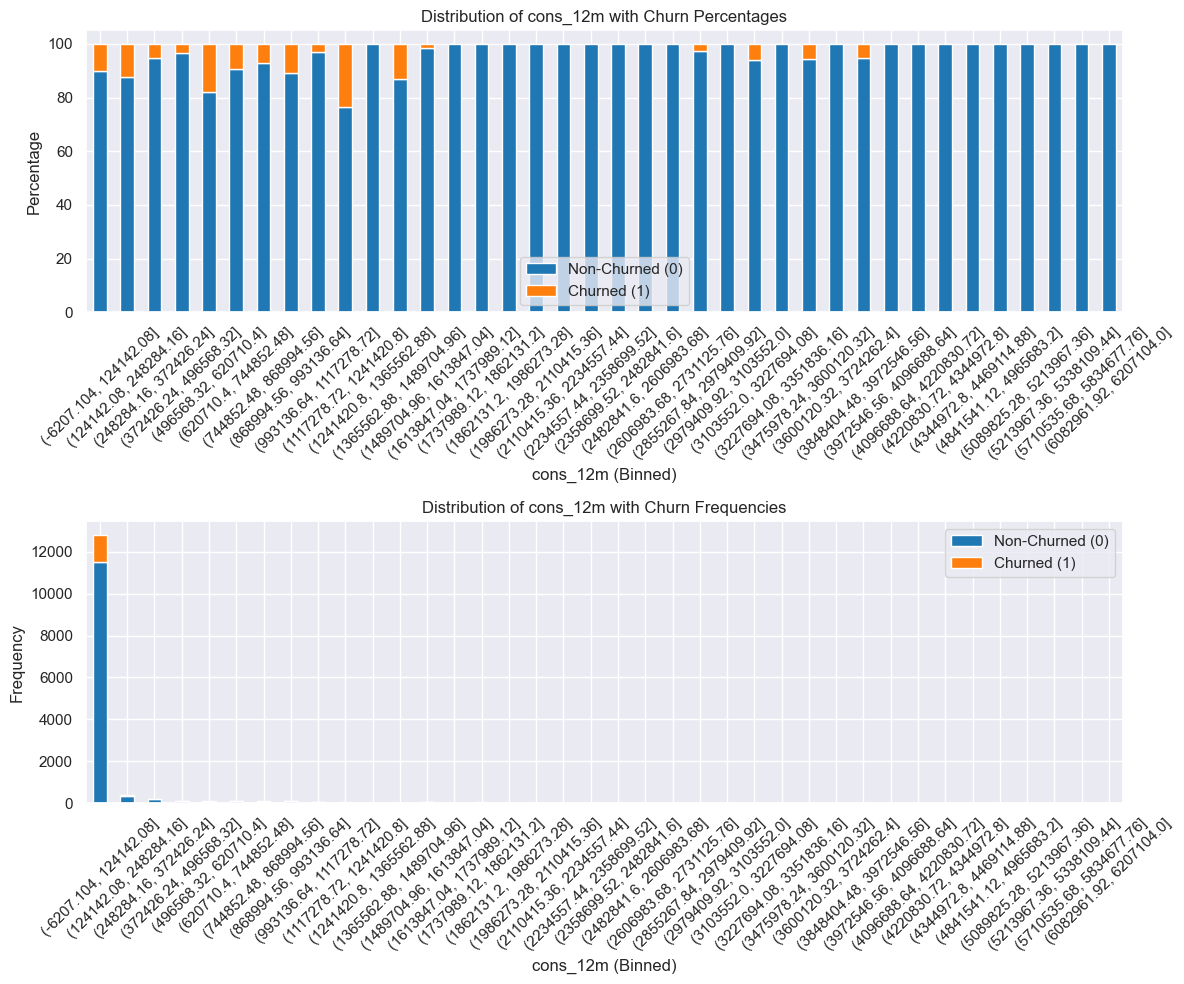

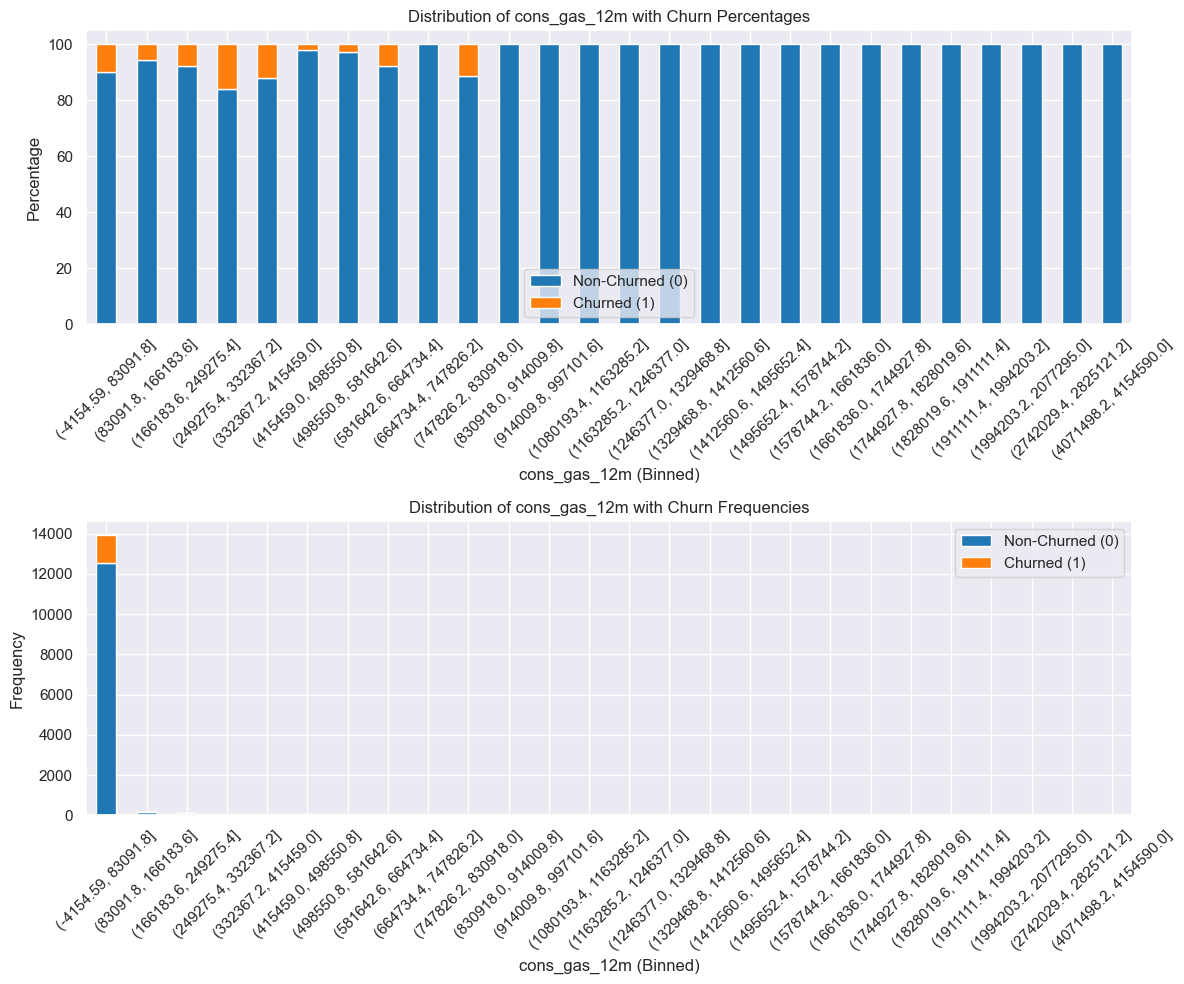

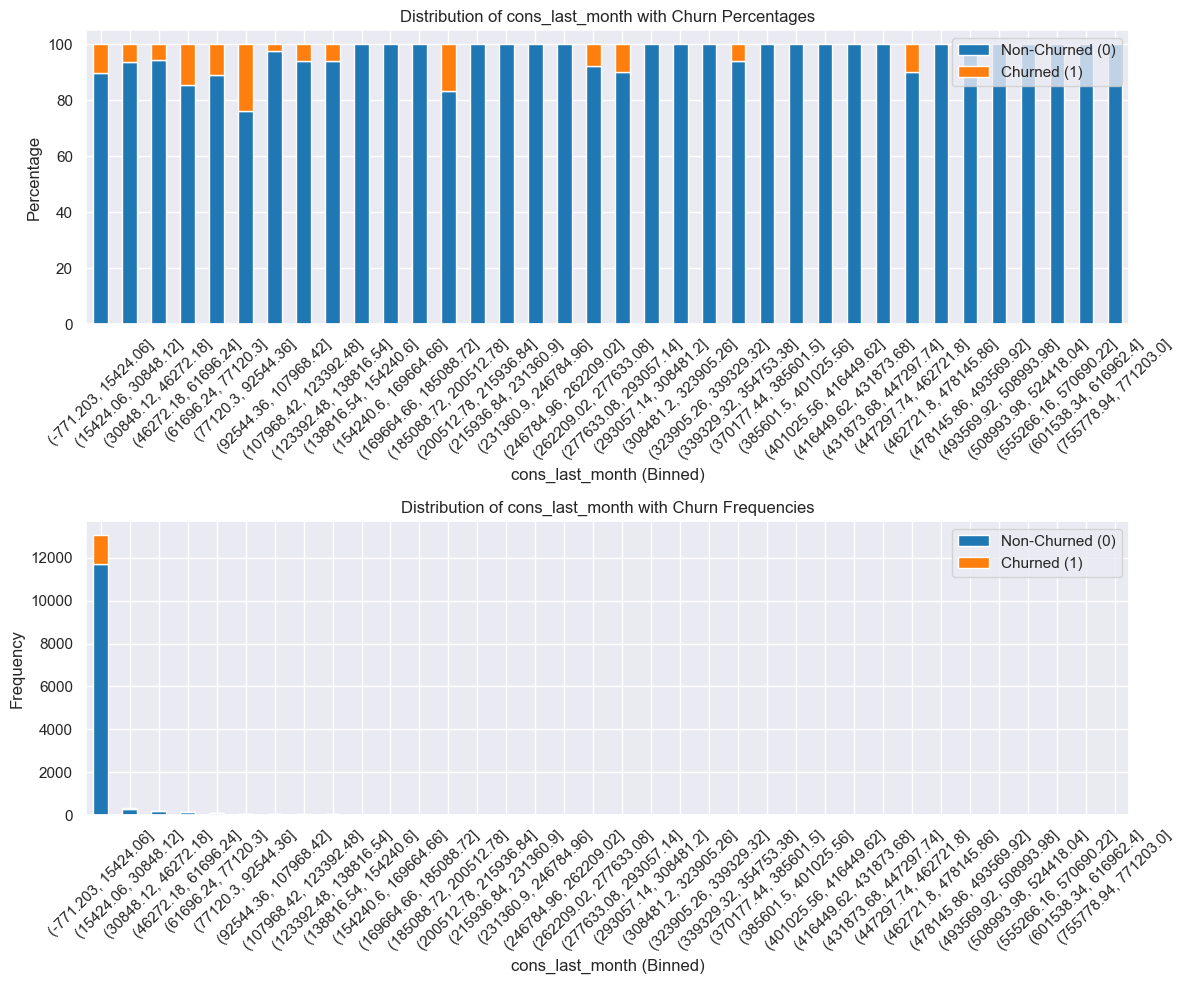

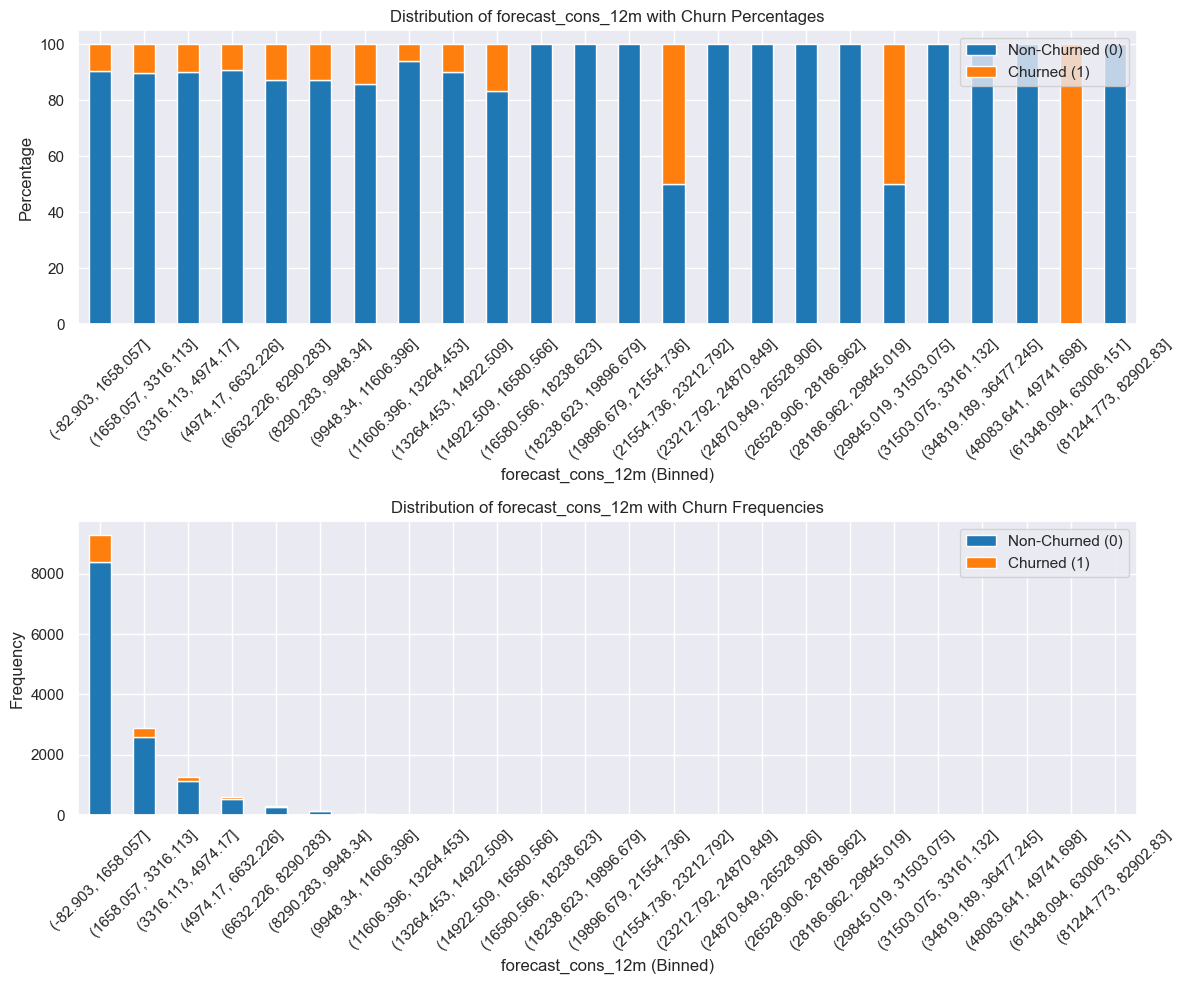

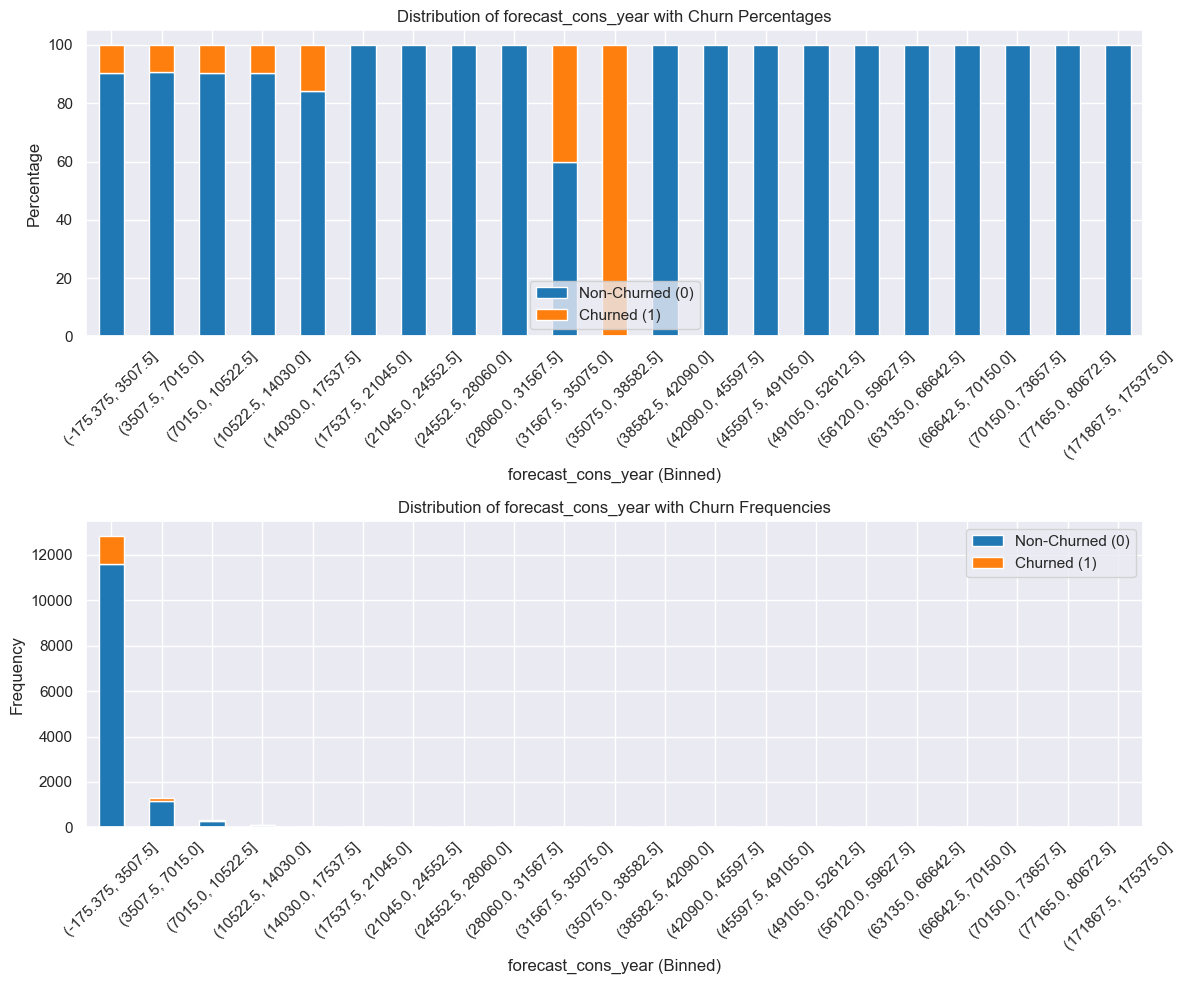

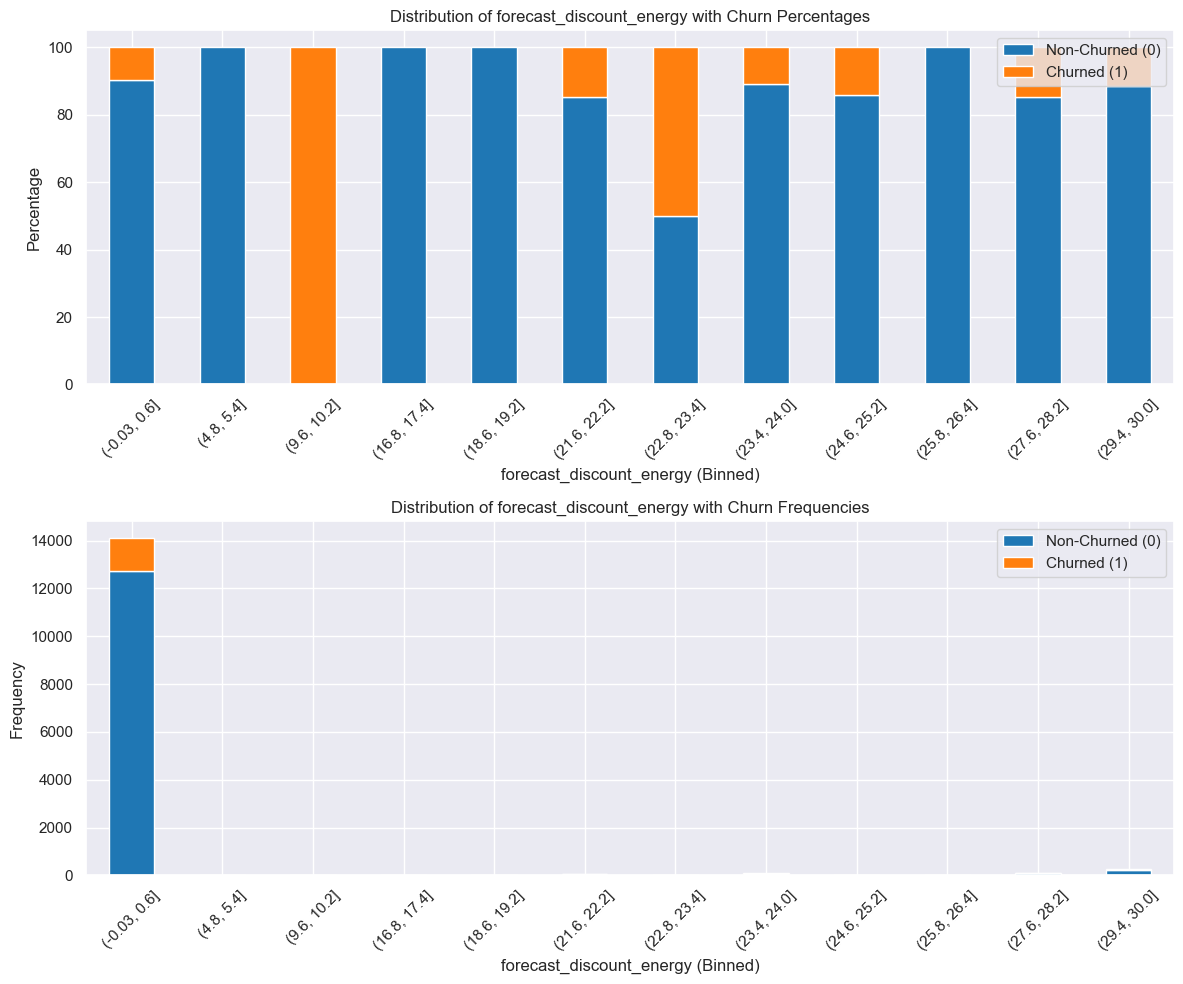

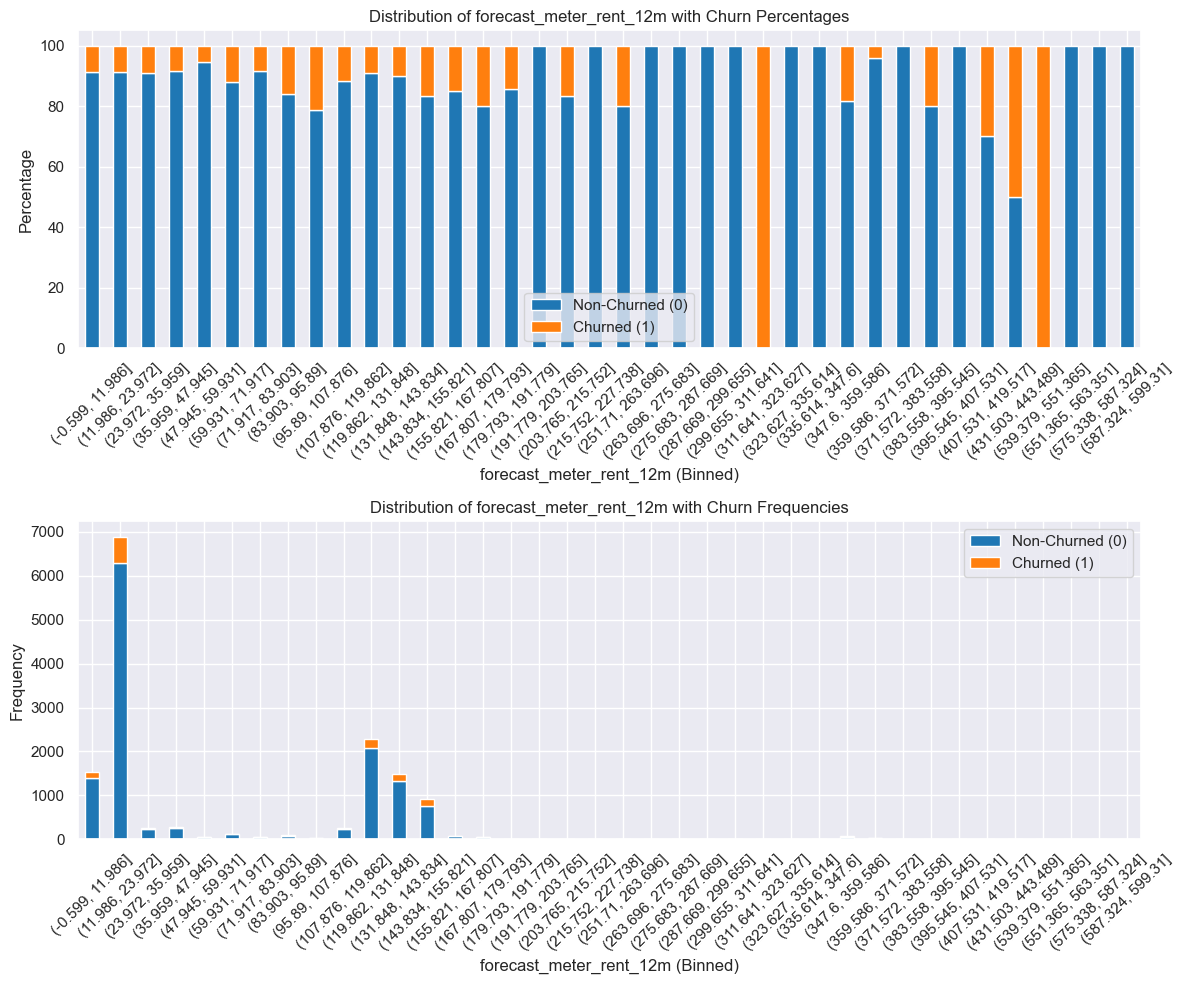

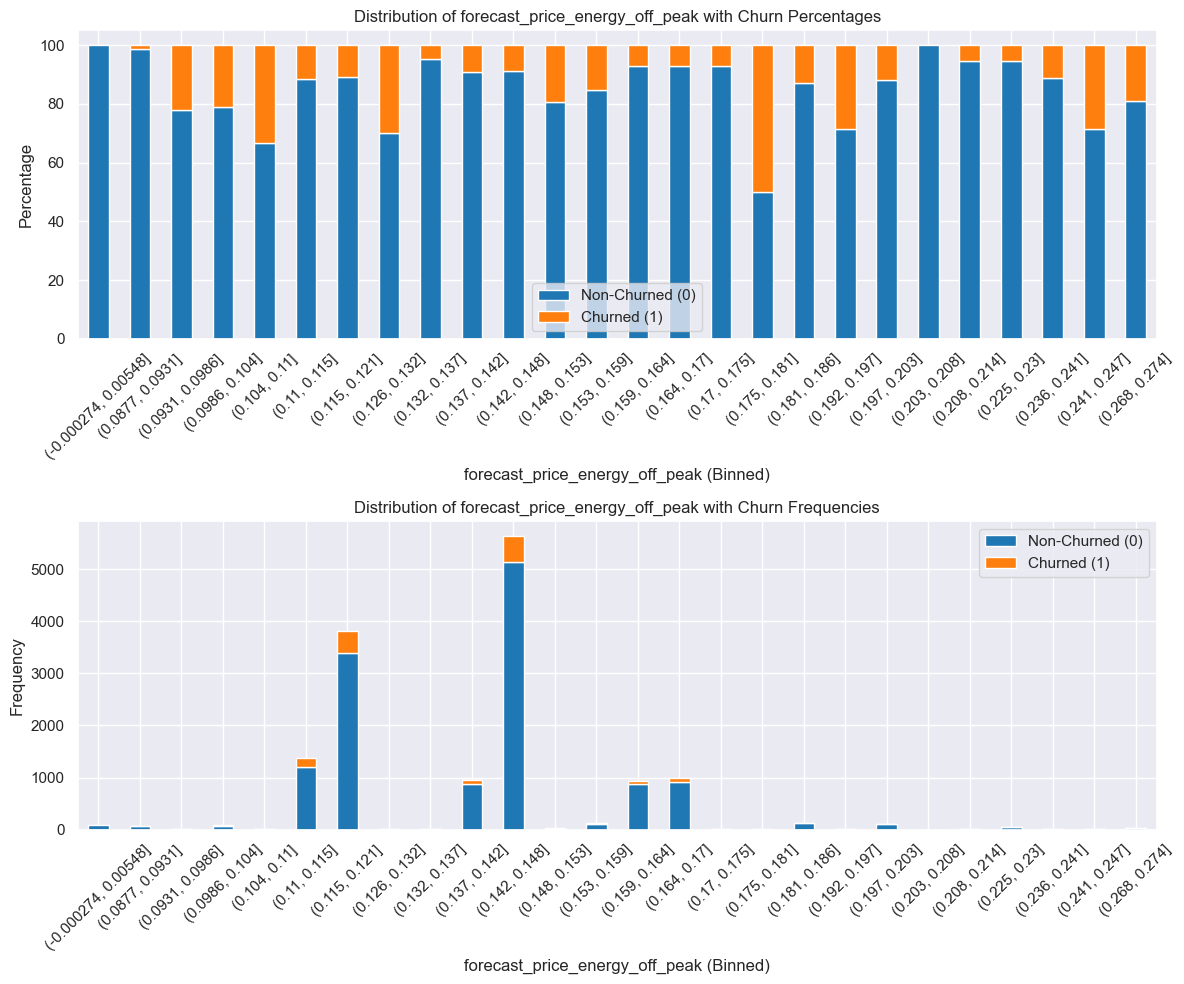

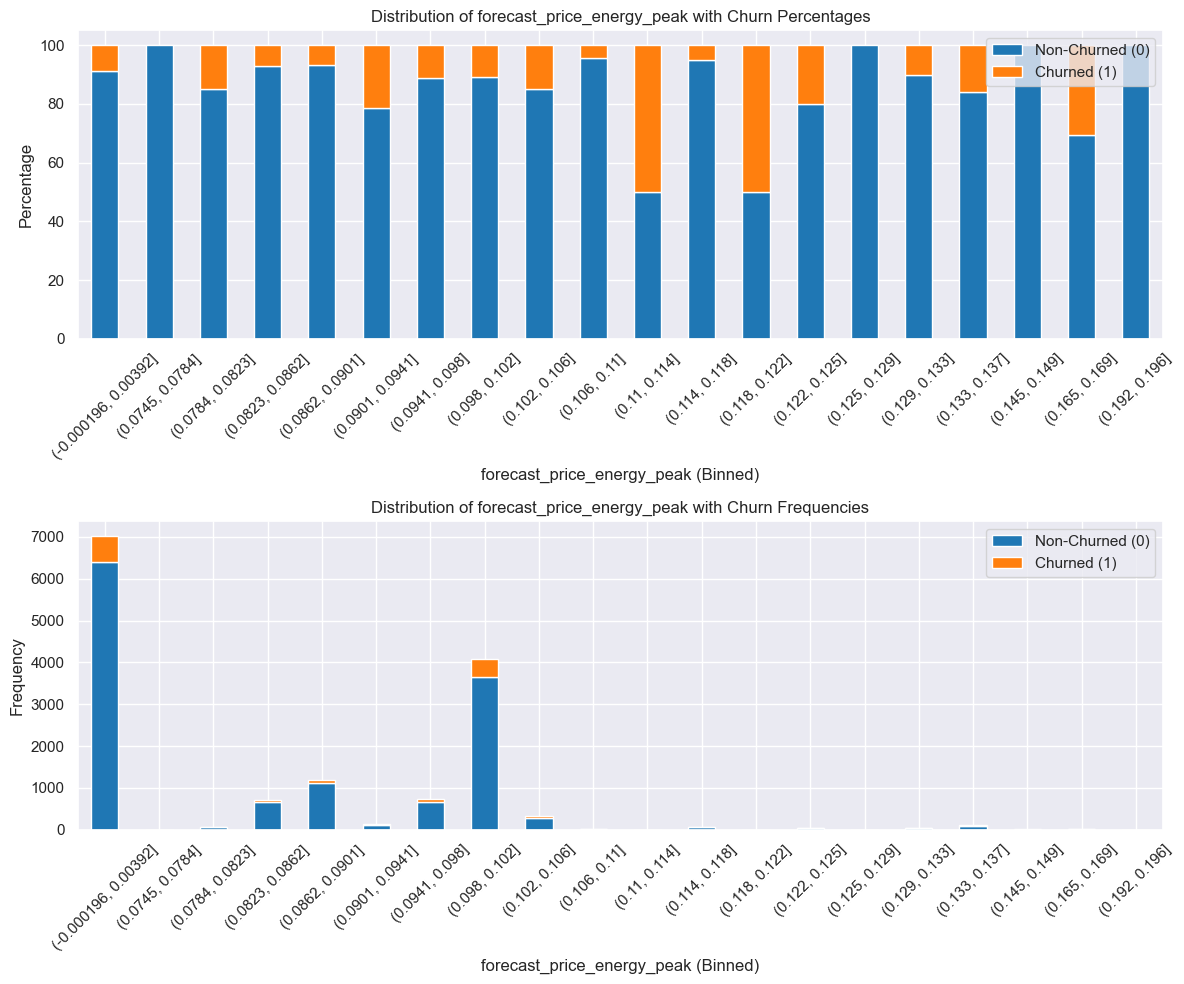

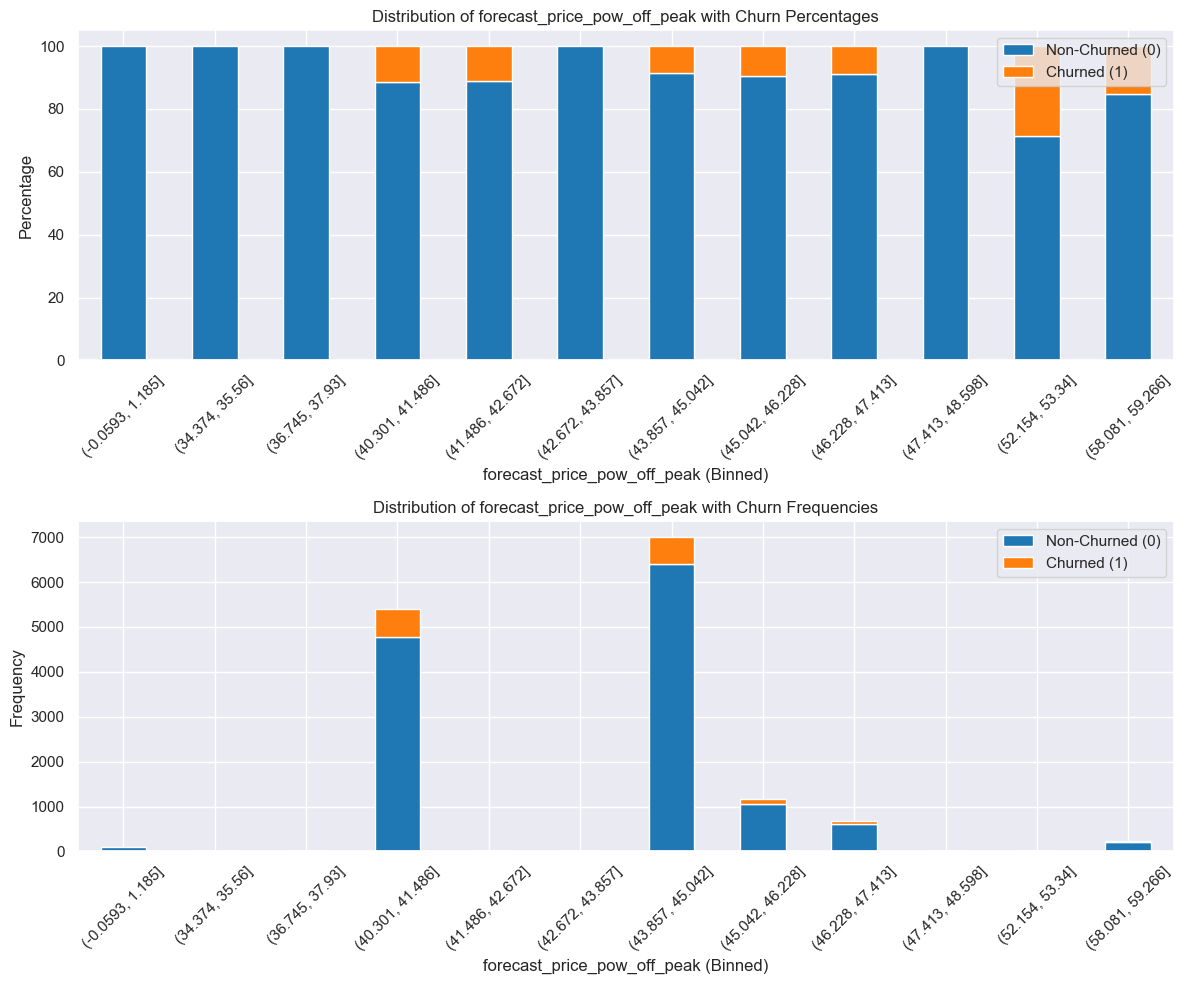

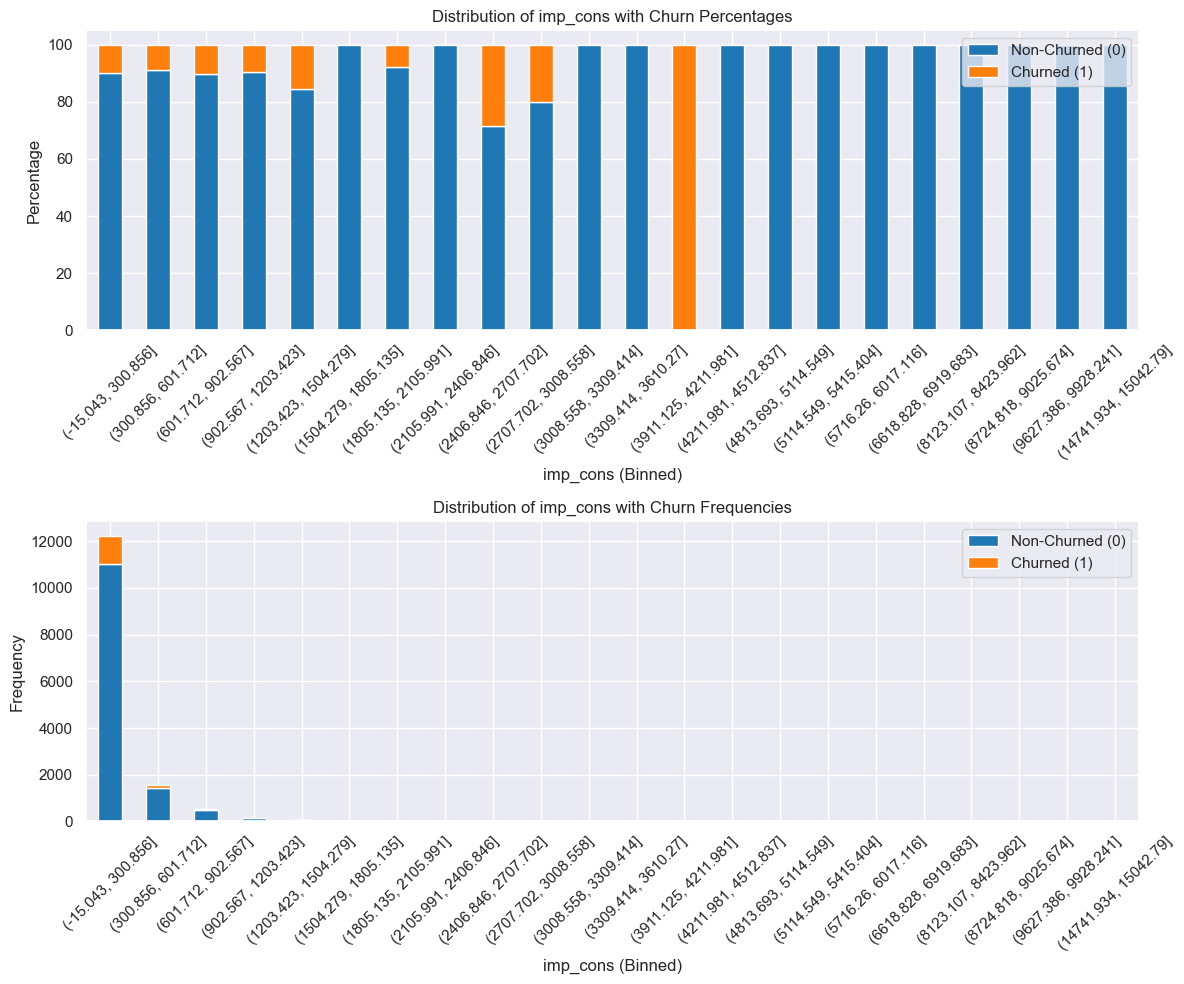

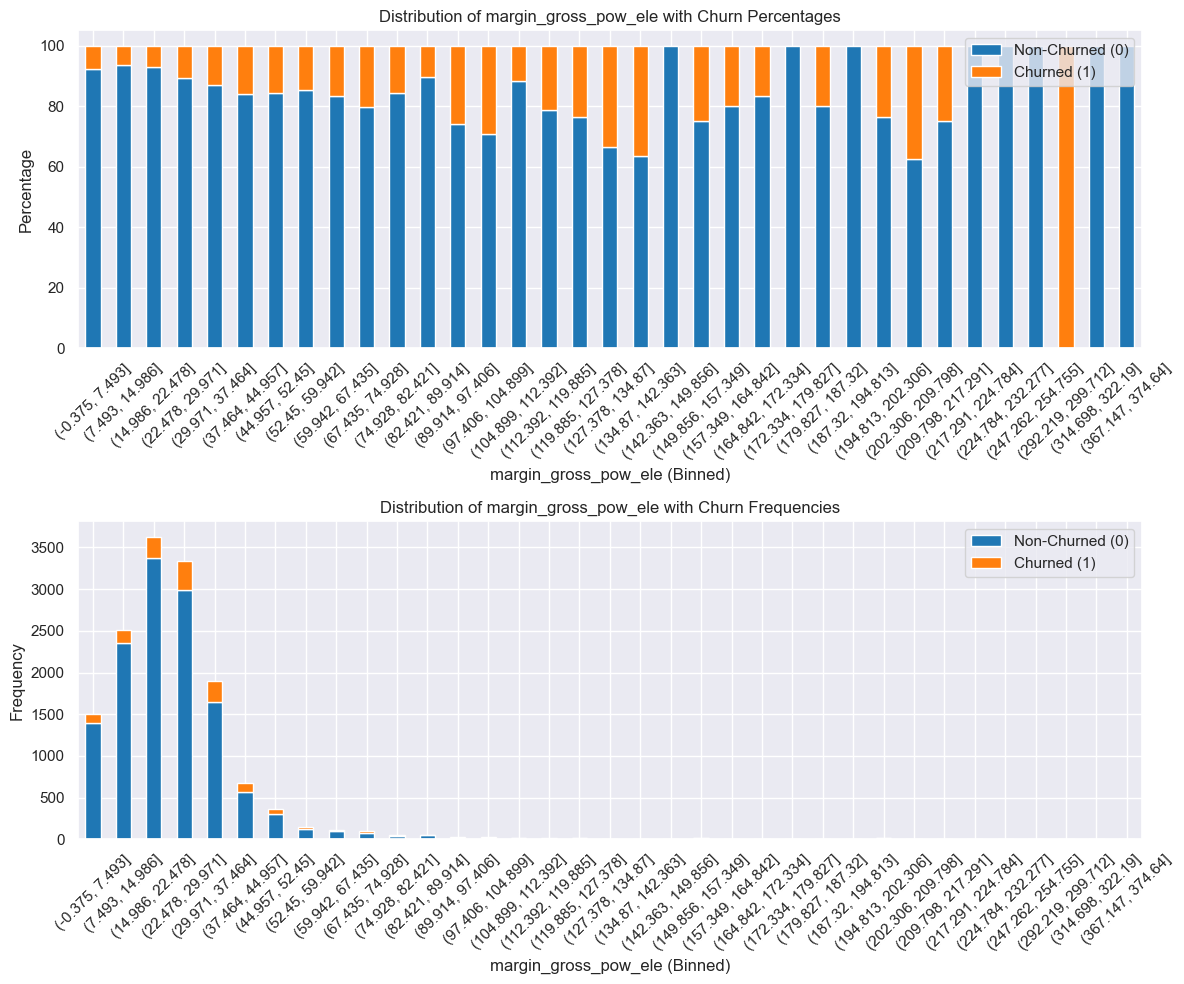

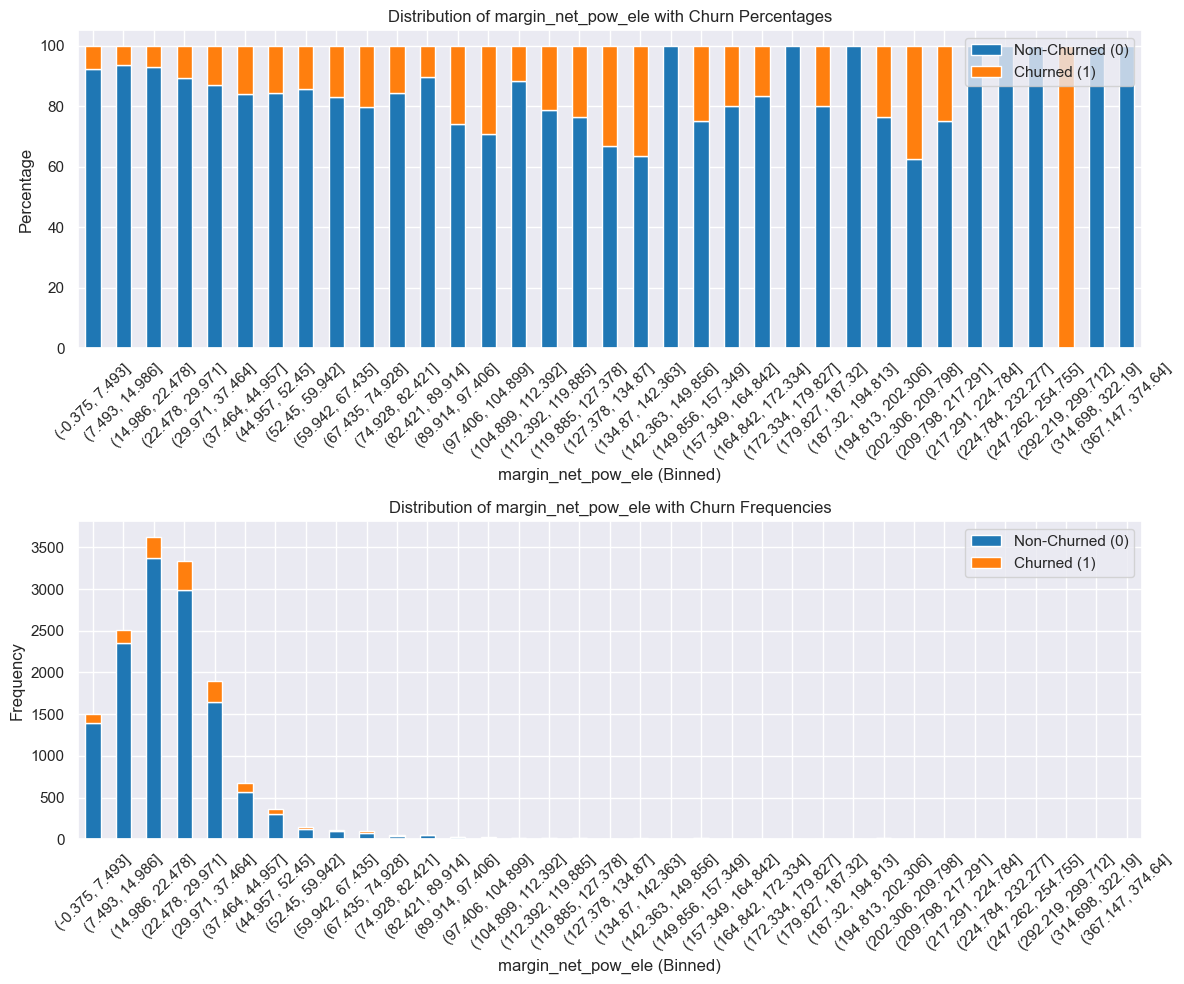

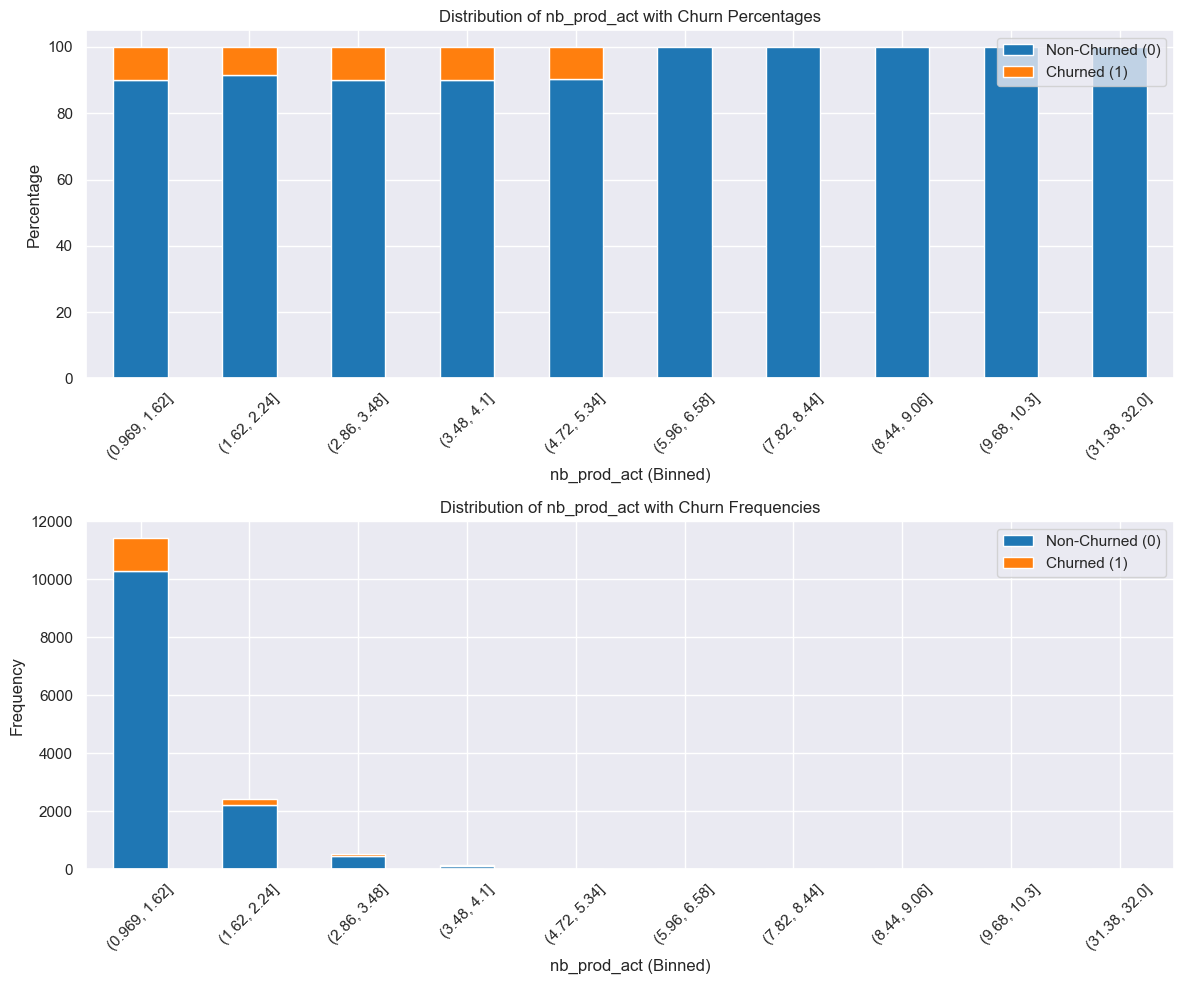

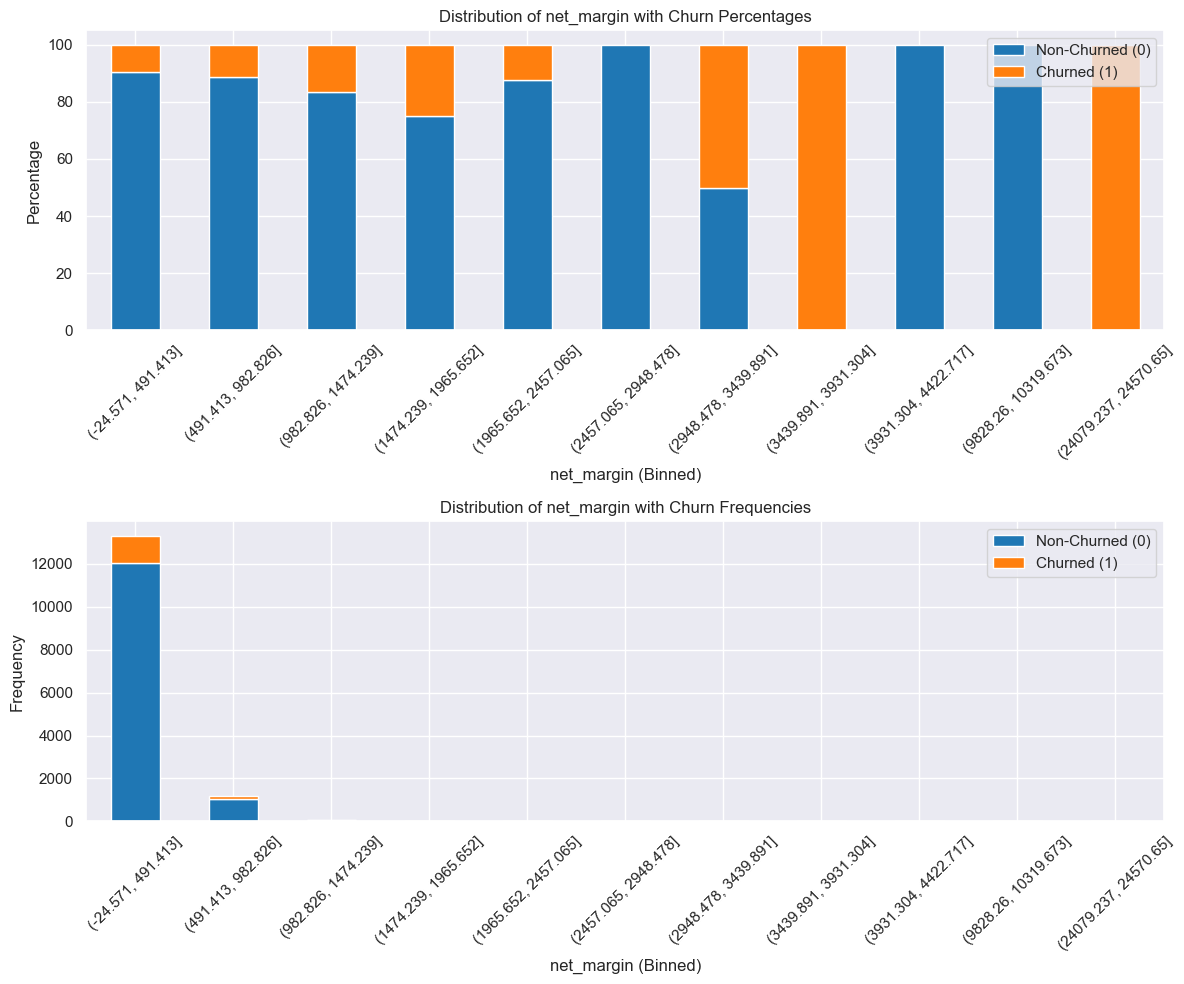

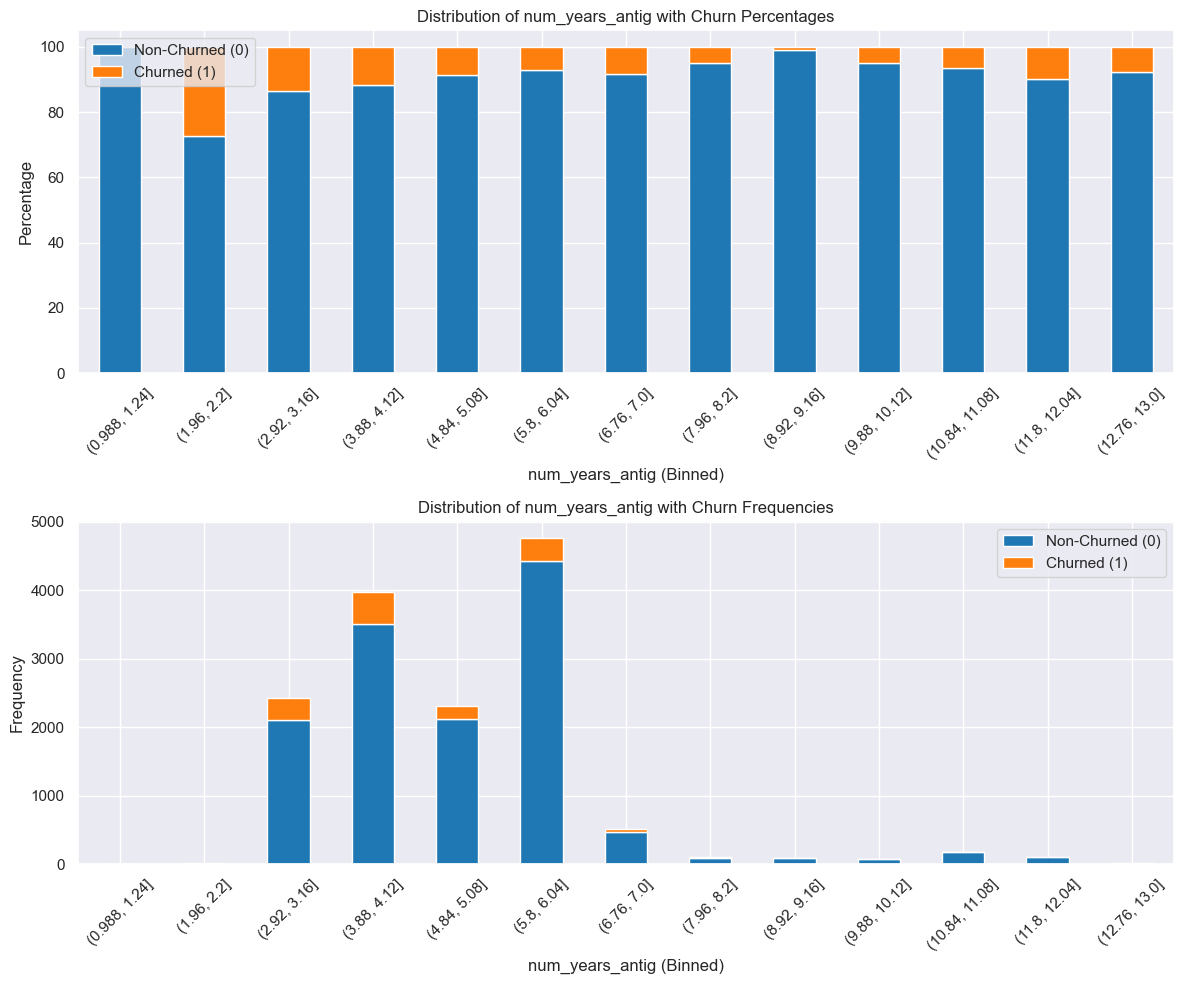

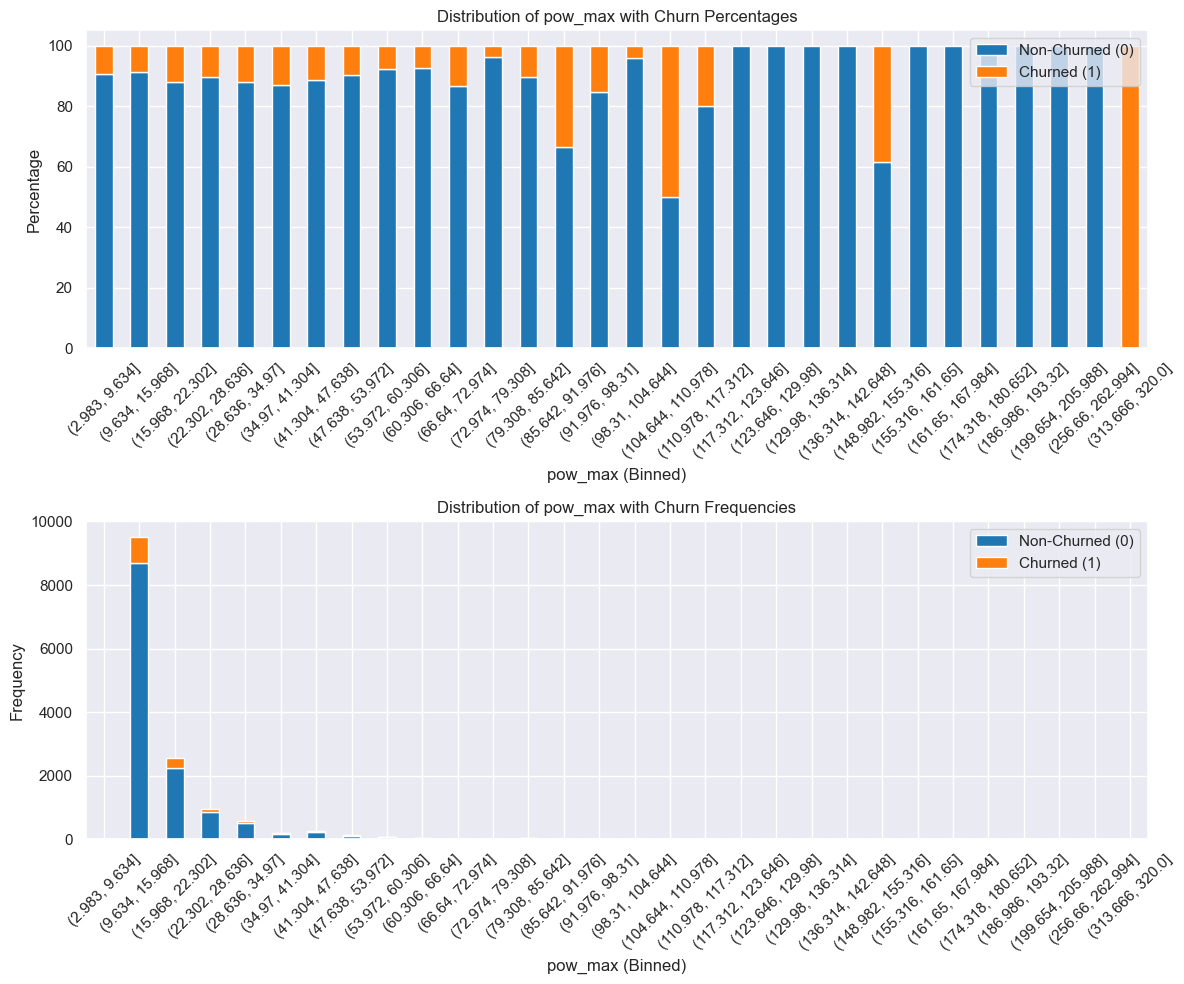

In [25]:
# Identify numerical columns
numerical_cols = client_df.select_dtypes(include=['int64', 'float64']).columns.drop('churn')

# Plot distributions with churn percentages and frequencies
for col in numerical_cols:
    fig, axs = plt.subplots(nrows=2, figsize=(12, 10))
    # Percentage plot
    plot_distribution(client_df, col, axs[0], bins=50, use_percentage=True)
    # Frequency plot
    plot_distribution(client_df, col, axs[1], bins=50, use_percentage=False)
    plt.show()

---

## Categorical Columns Analysis

Analyze the distribution of categorical columns with both churn percentages and frequencies.

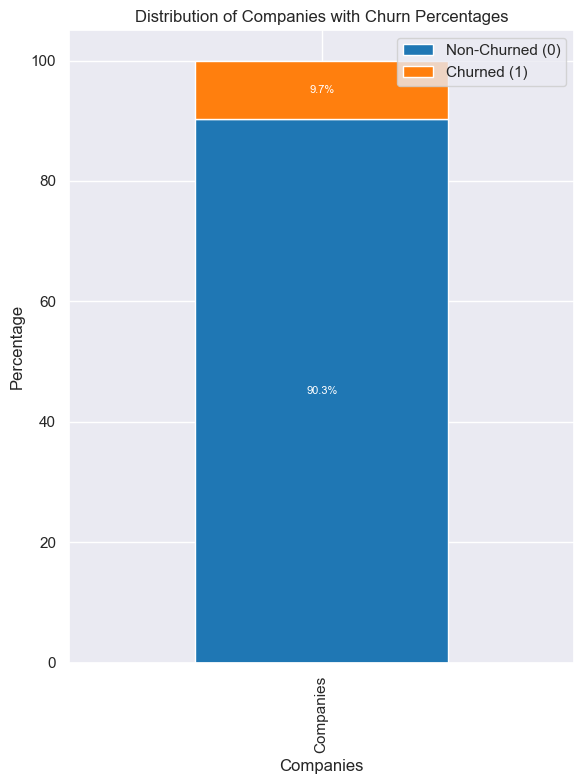

In [44]:
plot_df = client_df.copy()

# Add a temporary column with constant value 'Companies' to simulate a single category
plot_df['Companies'] = 'Companies'

# Plot single stacked bar with churn percentages
fig, ax = plt.subplots(figsize=(6, 8))
plot_distribution(plot_df, 'Companies', ax, is_categorical=True, use_percentage=True)
plt.tight_layout()
plt.show()

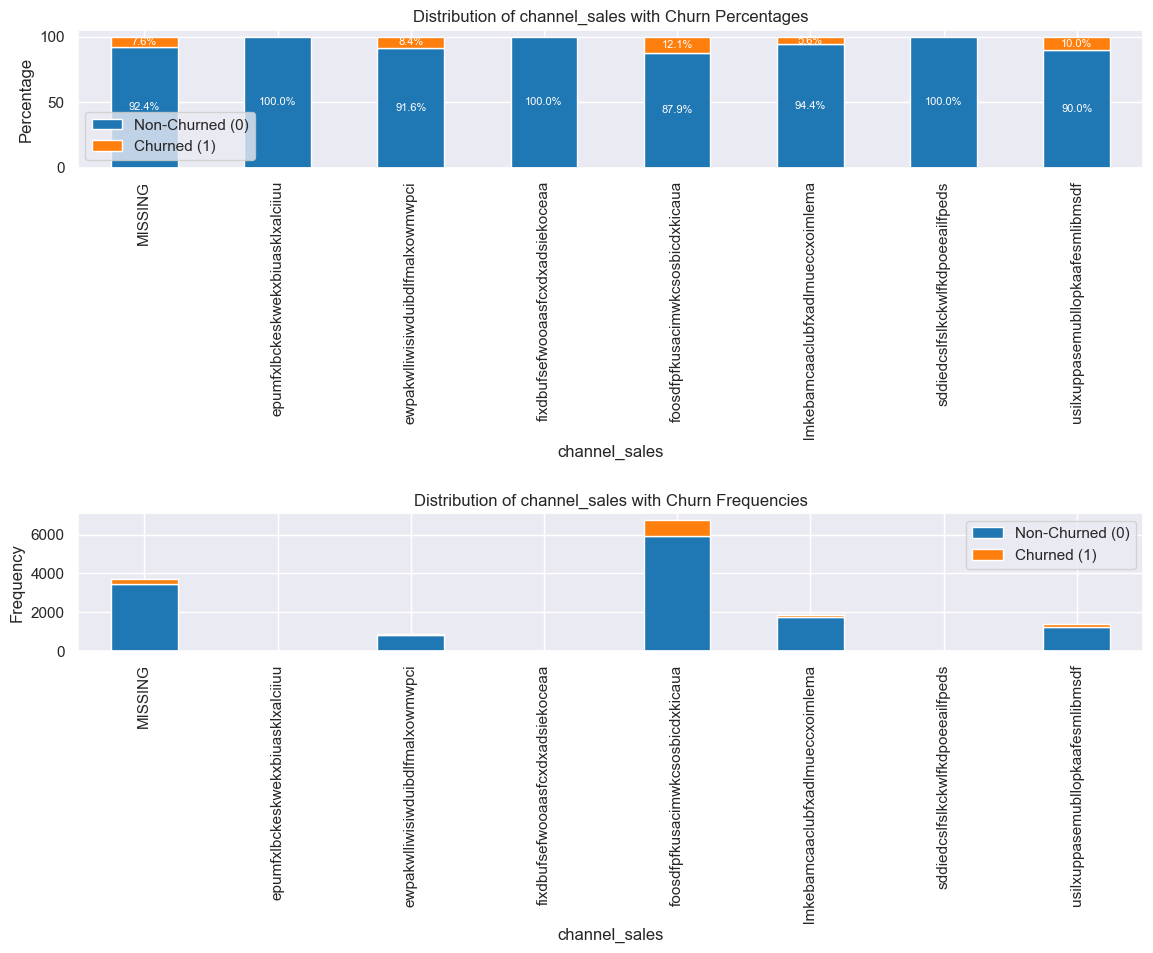

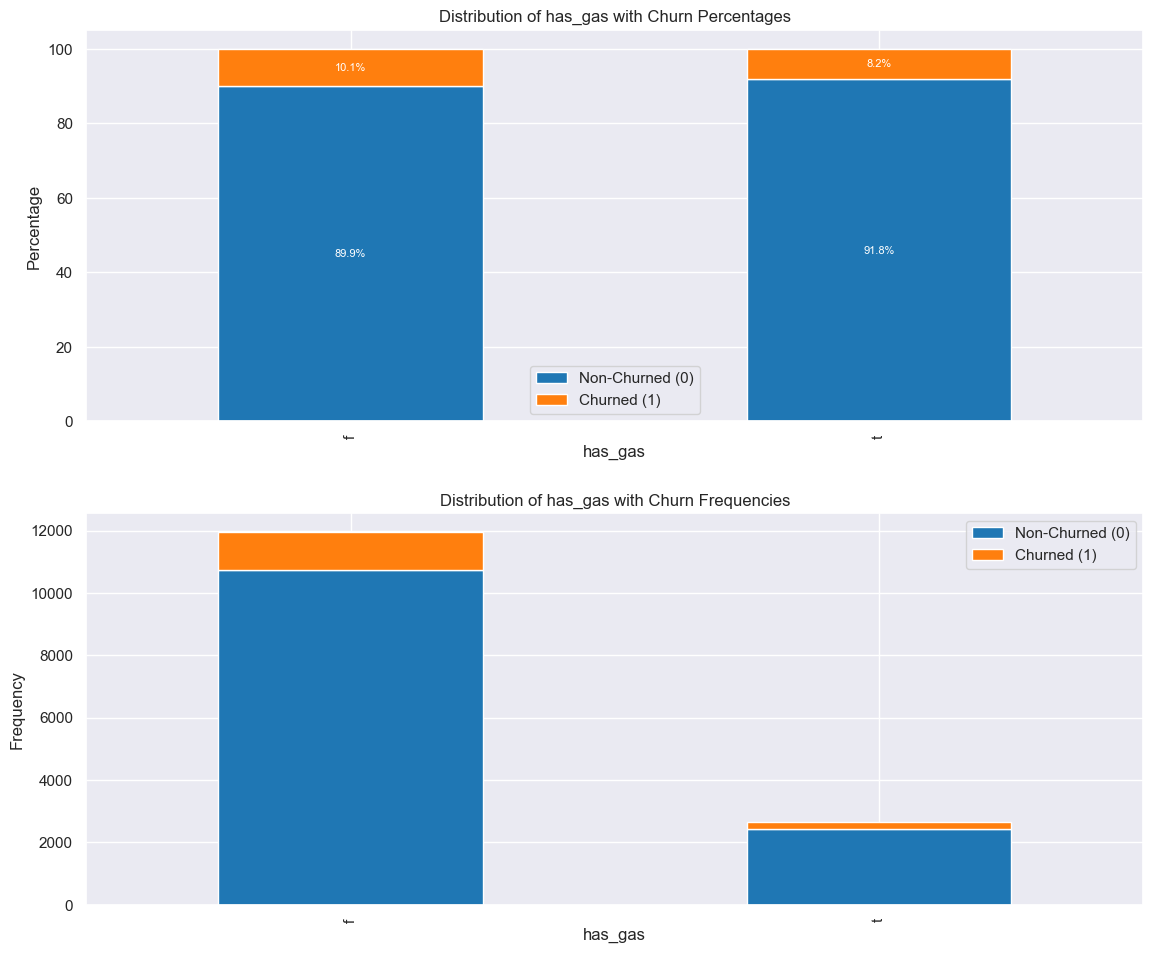

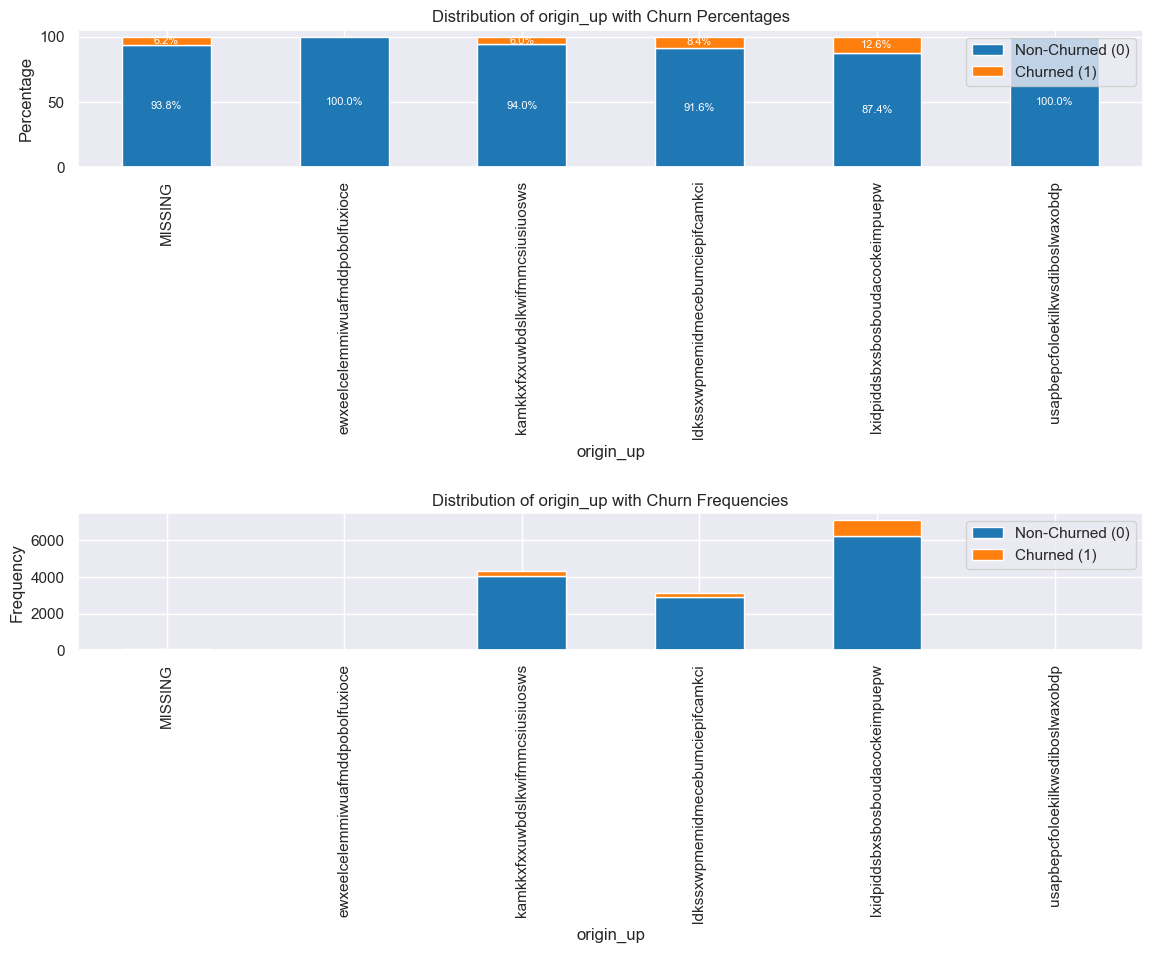

In [26]:
# Identify categorical columns
categorical_cols = ['channel_sales', 'has_gas', 'origin_up']

# Plot distributions with churn percentages and frequencies
for col in categorical_cols:
    fig, axs = plt.subplots(nrows=2, figsize=(12, 10))
    
    # Percentage plot with labels
    plot_distribution(client_df, col, axs[0], is_categorical=True, use_percentage=True)
    
    # Frequency plot
    plot_distribution(client_df, col, axs[1], is_categorical=True, use_percentage=False)
    
    plt.tight_layout(pad=2.0)
    plt.show()

---

## Date Columns Analysis

Convert date columns to datetime and extract features (e.g., year) for churn analysis with both percentages and frequencies.

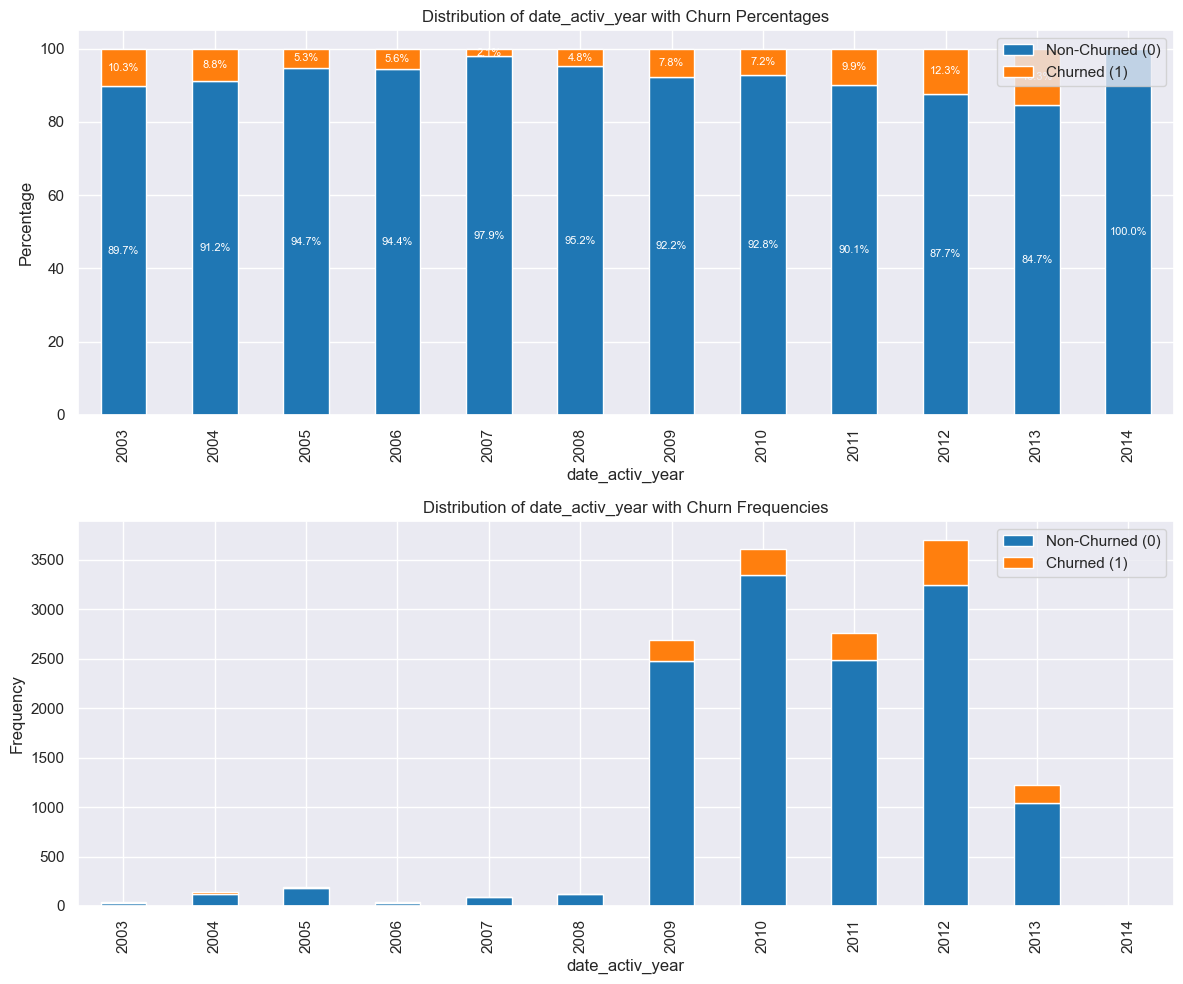

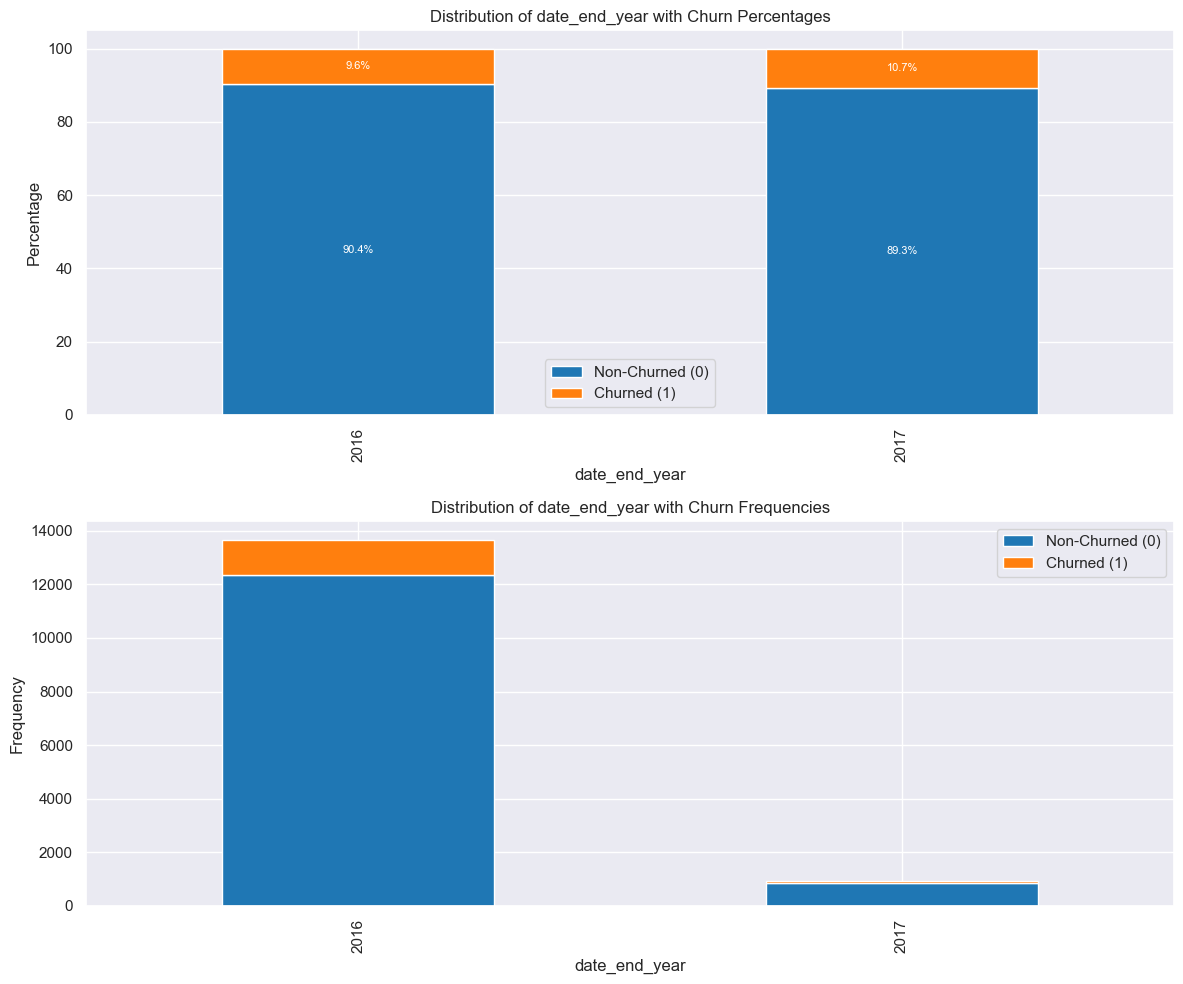

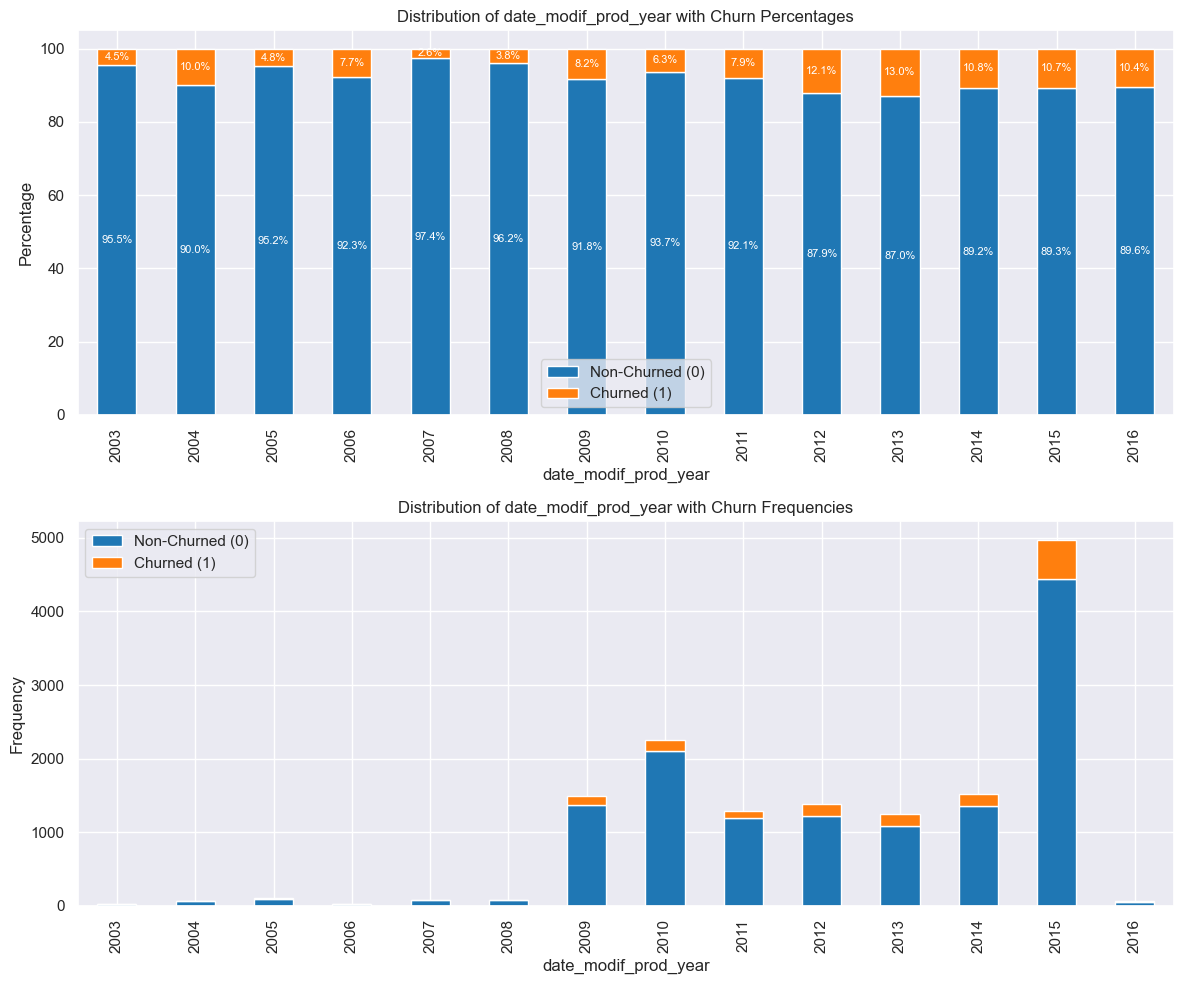

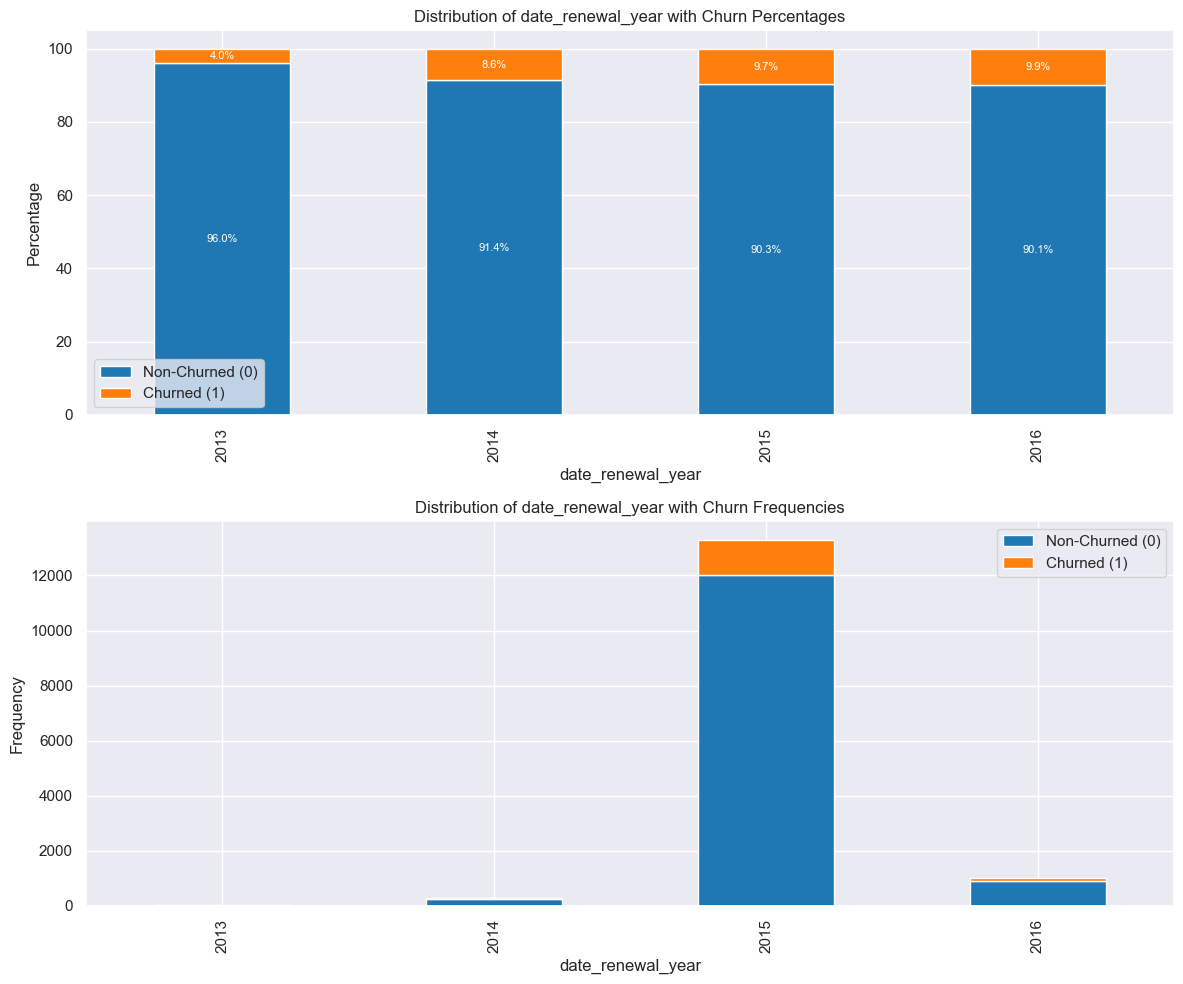

In [27]:
# Convert date columns to datetime
date_cols = ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']
for col in date_cols:
    client_df[col] = pd.to_datetime(client_df[col])

# Extract year from date columns
for col in date_cols:
    client_df[f'{col}_year'] = client_df[col].dt.year

# Plot distributions with churn percentages and frequencies for year columns
year_cols = [f'{col}_year' for col in date_cols]
for col in year_cols:
    fig, axs = plt.subplots(nrows=2, figsize=(12, 10))
    # Percentage plot
    plot_distribution(client_df, col, axs[0], is_categorical=True, use_percentage=True)
    # Frequency plot
    plot_distribution(client_df, col, axs[1], is_categorical=True, use_percentage=False)
    plt.show()

---

## Price Data Aggregation and Analysis

Aggregate `price_df` to client-level metrics and analyze distributions with both churn percentages and frequencies.

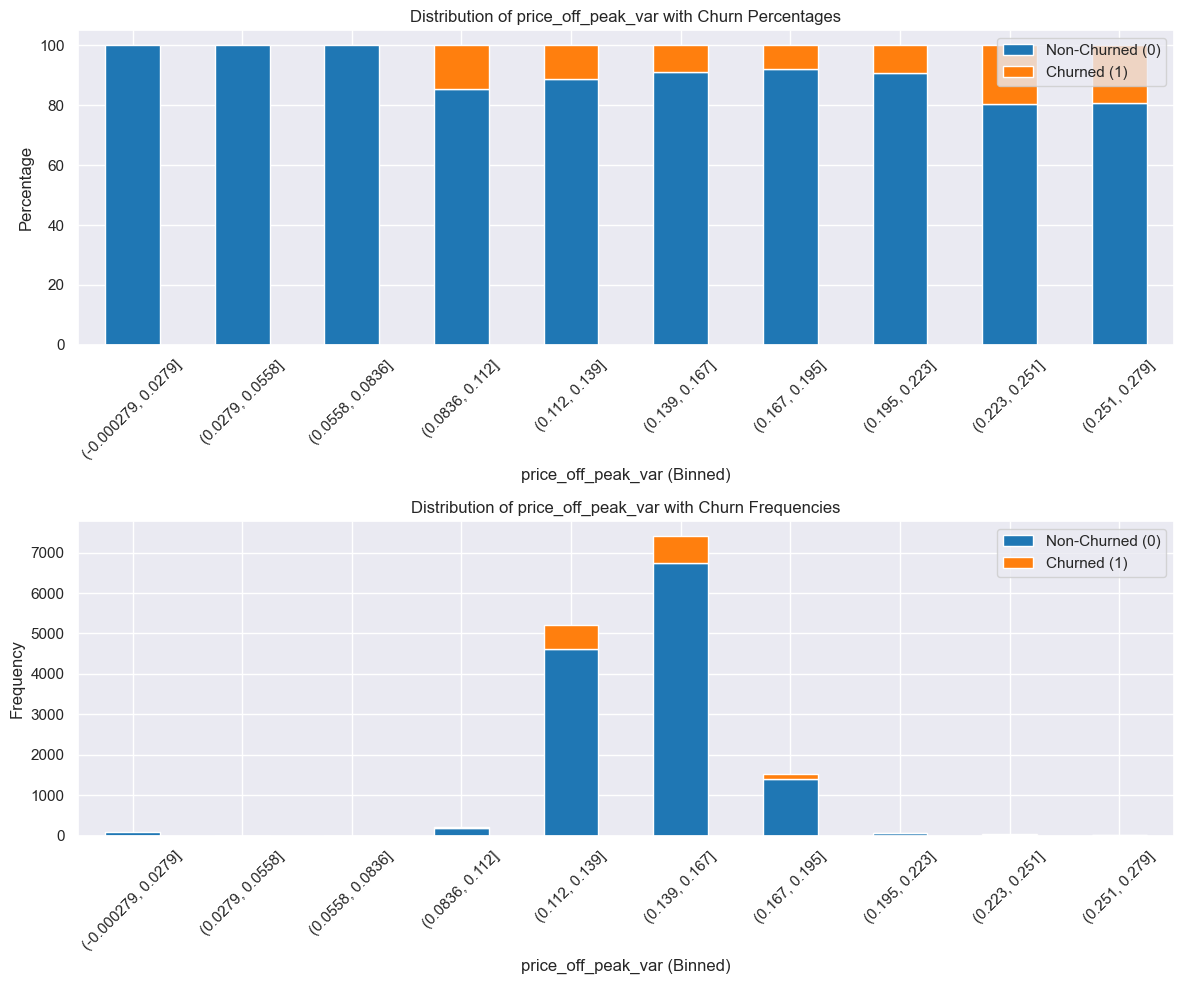

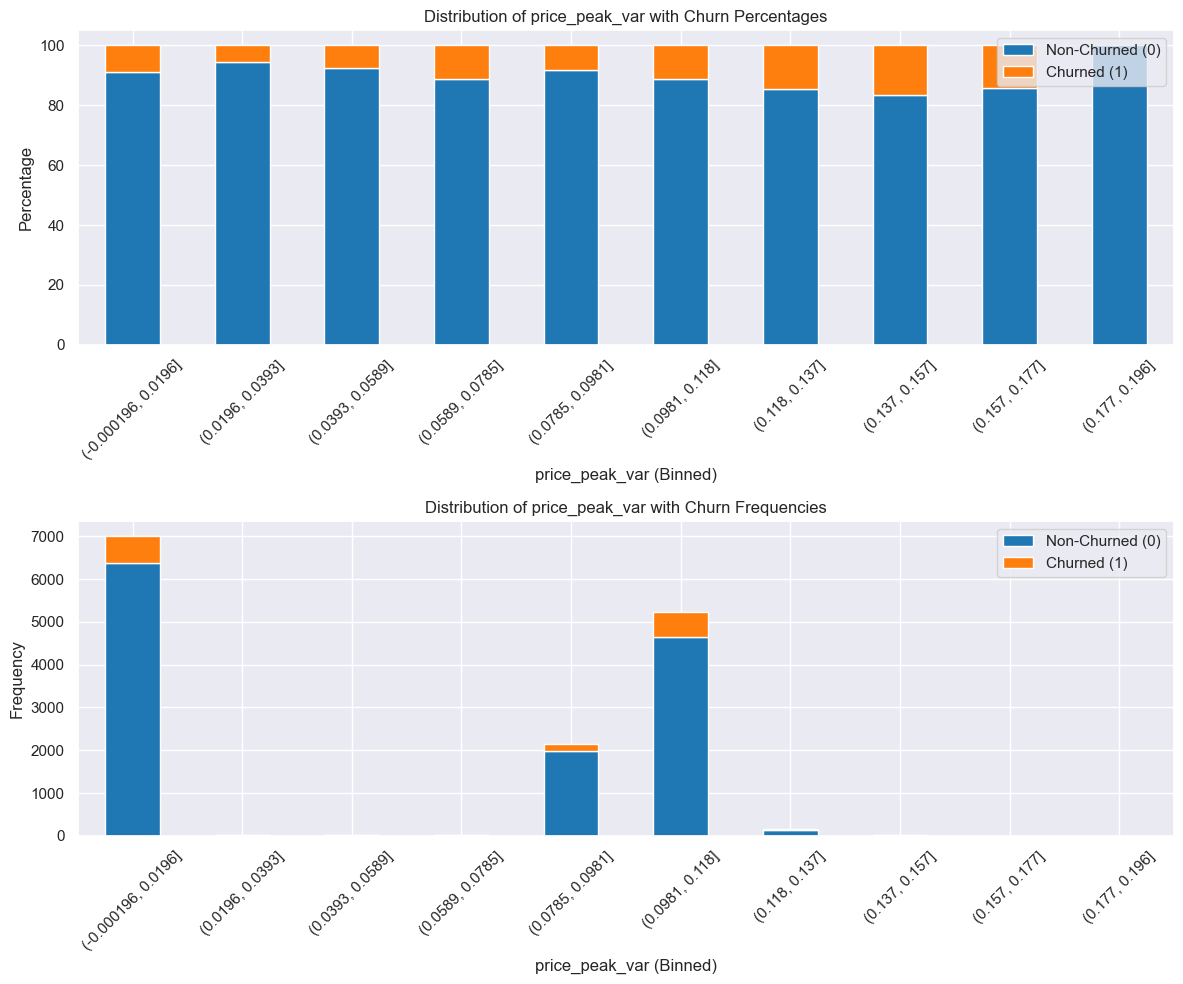

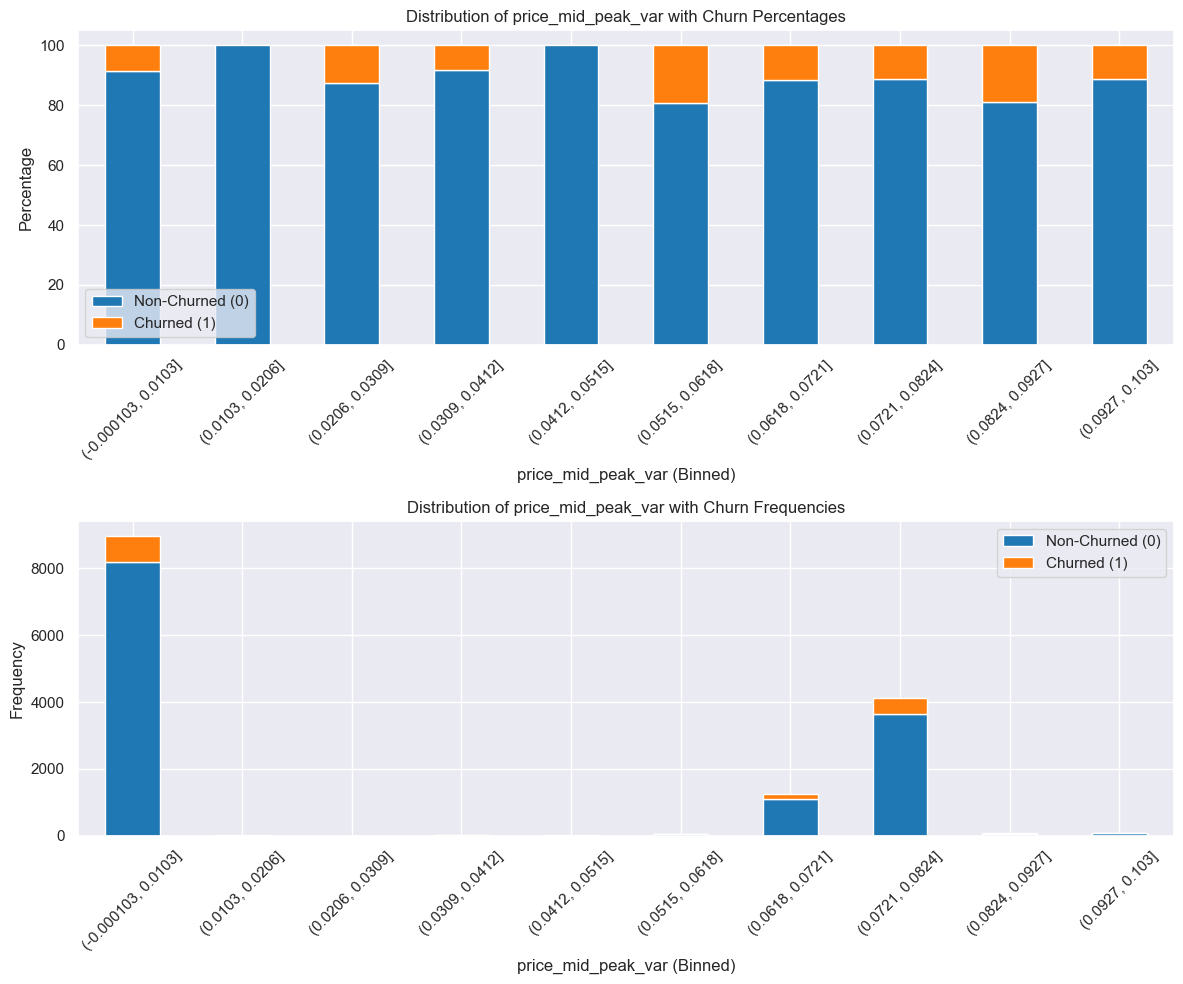

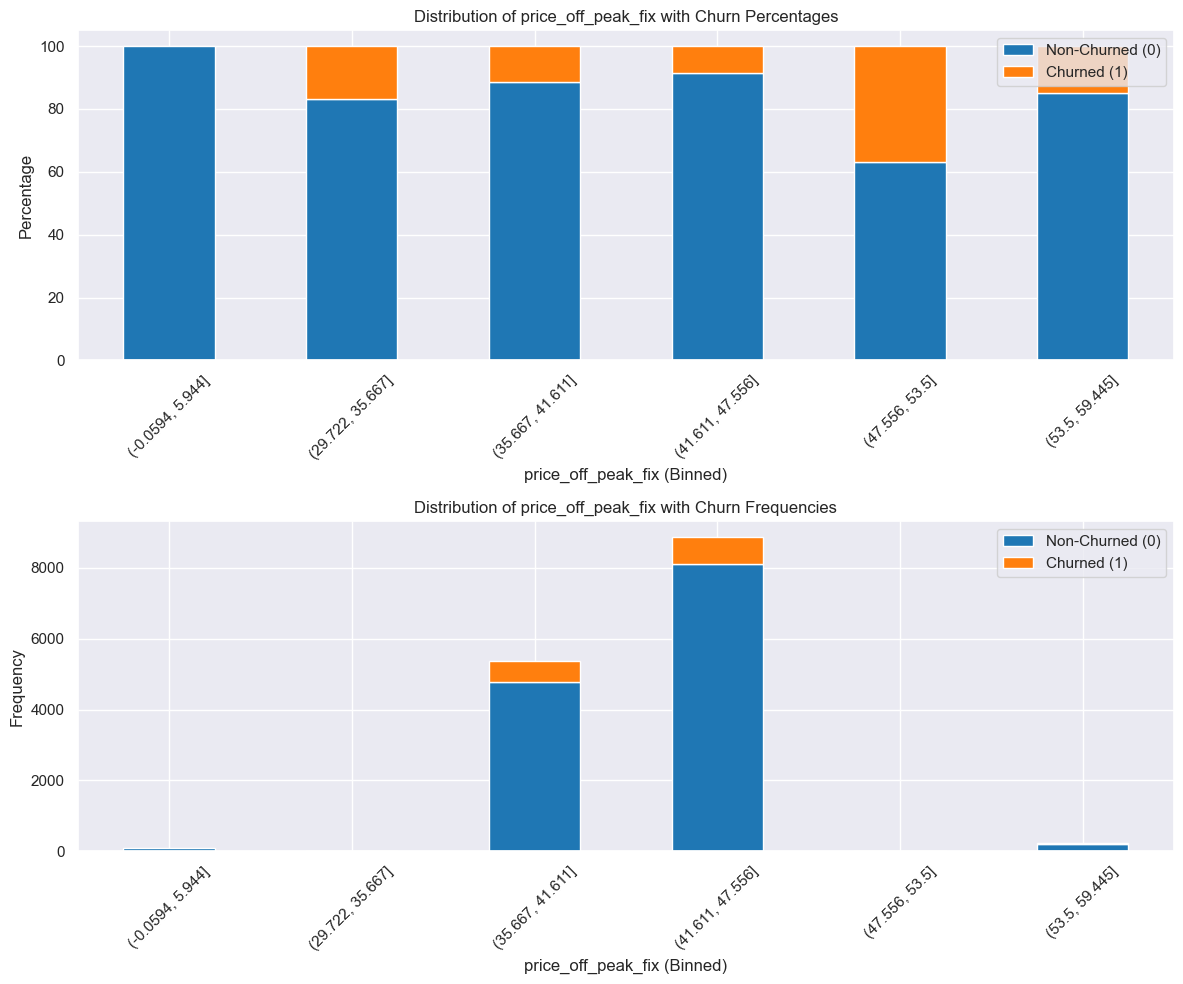

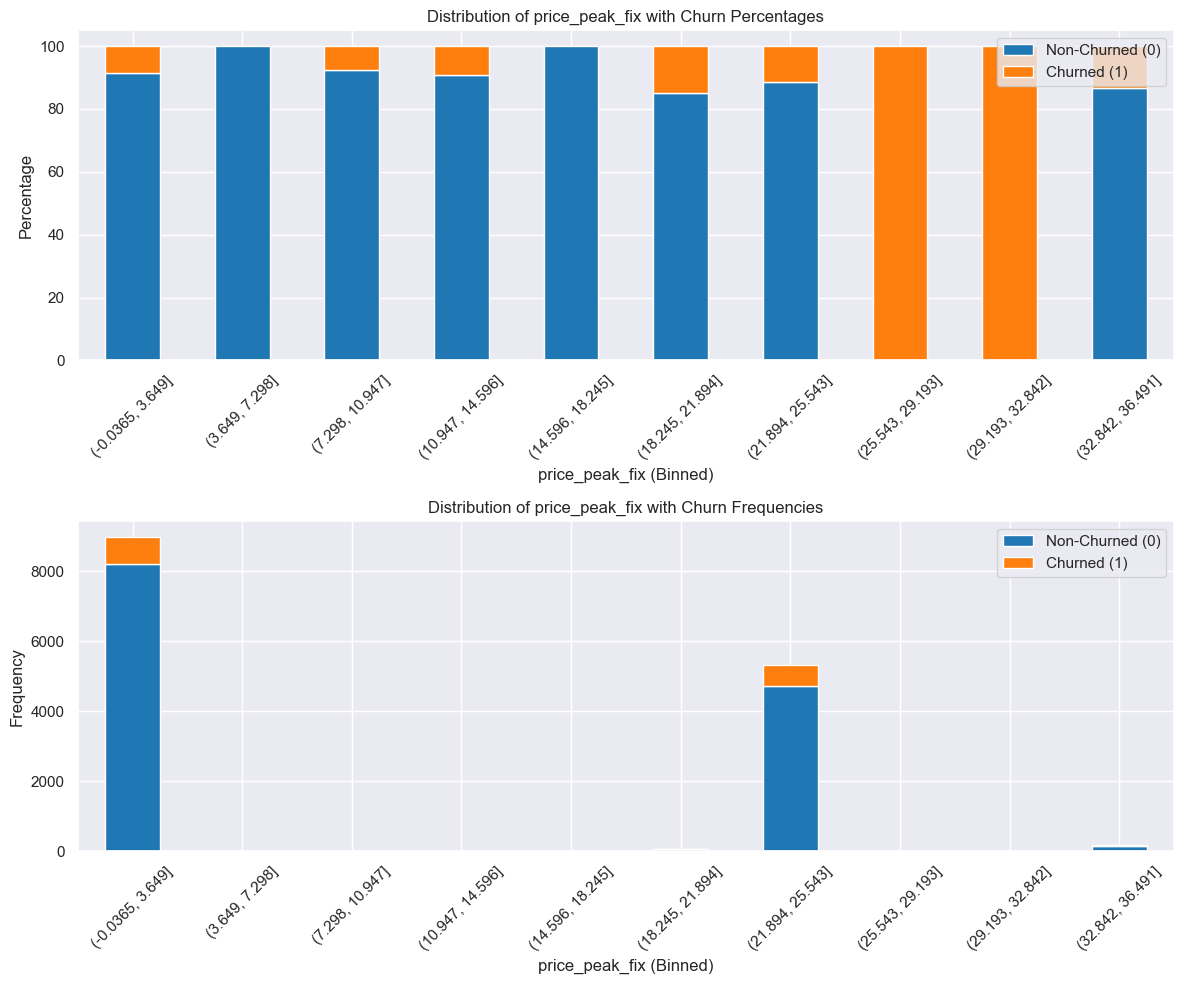

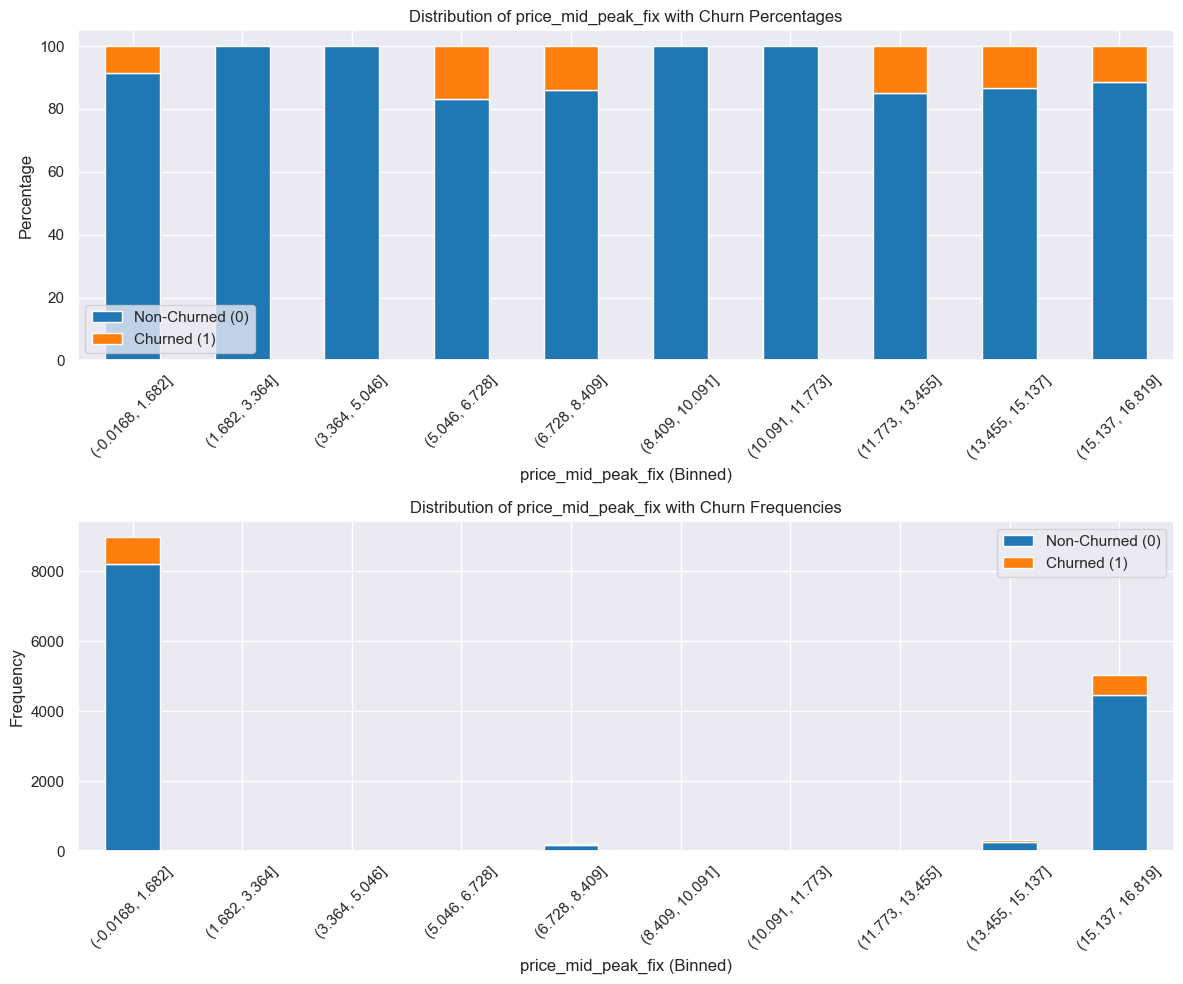

In [28]:
# Aggregate price data by client ID (mean prices)
price_agg = price_df.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

# Merge with client_df to include churn
price_agg = price_agg.merge(client_df[['id', 'churn']], on='id', how='left')

# Plot distributions with churn percentages and frequencies
price_cols = ['price_off_peak_var', 'price_peak_var', 'price_mid_peak_var',
              'price_off_peak_fix', 'price_peak_fix', 'price_mid_peak_fix']
for col in price_cols:
    fig, axs = plt.subplots(nrows=2, figsize=(12, 10))
    # Percentage plot
    plot_distribution(price_agg, col, axs[0], bins=10, use_percentage=True)
    # Frequency plot
    plot_distribution(price_agg, col, axs[1], bins=10, use_percentage=False)
    plt.show()

---

## Correlation Analysis

Explore correlations between numerical features and churn.

In [ ]:
# Compute correlation matrix
corr_matrix = client_df[numerical_cols.append(pd.Index(['churn']))].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Churn')
plt.show()

---

## Top 10% Margin_Gross_Pow_Ele Analysis

Identify clients with `margin_gross_pow_ele` in the top 10% percentile and analyze why they have high gross margins with both percentage and frequency plots.

In [ ]:
# Calculate the 90th percentile of margin_gross_pow_ele
margin_threshold = client_df['margin_gross_pow_ele'].quantile(0.9)
print(f'90th percentile of margin_gross_pow_ele: {margin_threshold:.2f}')

# Filter rows in the top 10% percentile
top_10_margin_df = client_df[client_df['margin_gross_pow_ele'] >= margin_threshold]
print(f'Number of clients in top 10% margin_gross_pow_ele: {len(top_10_margin_df)}')

# Summary statistics for numerical columns in top 10%
print('\nSummary statistics for numerical columns in top 10% margin_gross_pow_ele:')
numerical_cols_top = numerical_cols[numerical_cols != 'margin_gross_pow_ele']  # Exclude the target column
display(top_10_margin_df[numerical_cols_top].describe())

# Compare churn rate in top 10% vs. overall
overall_churn_rate = client_df['churn'].mean() * 100
top_10_churn_rate = top_10_margin_df['churn'].mean() * 100
print(f'Overall churn rate: {overall_churn_rate:.2f}%')
print(f'Top 10% margin churn rate: {top_10_churn_rate:.2f}%')

# Analyze categorical columns in top 10%
print('\nDistribution of categorical columns in top 10% margin_gross_pow_ele:')
for col in categorical_cols:
    print(f'\n{col}:')
    display(top_10_margin_df[col].value_counts(normalize=True) * 100)

# Merge with aggregated price data
top_10_price_df = top_10_margin_df[['id', 'churn']].merge(price_agg, on=['id', 'churn'], how='left')

# Plot distributions of key numerical columns in top 10% with percentages and frequencies
key_cols = ['cons_12m', 'cons_last_month', 'pow_max', 'margin_net_pow_ele'] + price_cols
for col in key_cols:
    fig, axs = plt.subplots(nrows=2, figsize=(12, 10))
    df_to_plot = top_10_margin_df if col in top_10_margin_df.columns else top_10_price_df
    # Percentage plot
    plot_distribution(df_to_plot, col, axs[0], bins=10, use_percentage=True)
    # Frequency plot
    plot_distribution(df_to_plot, col, axs[1], bins=10, use_percentage=False)
    plt.show()

# Correlation analysis for top 10% margin clients
corr_matrix_top = top_10_margin_df[numerical_cols.append(pd.Index(['churn']))].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_top, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Top 10% Margin_Gross_Pow_Ele Clients')
plt.show()

# Insights
print('\nInsights on high margin_gross_pow_ele clients:')
print('- High gross margins may be driven by higher subscription prices (check price_cols distributions).')
print('- Compare consumption patterns (cons_12m, cons_last_month) to see if low usage contributes.')
print('- Check if specific sales channels or contract types (channel_sales, origin_up) dominate.')
print('- Lower churn rates in top 10% suggest high-margin clients are more loyal.')
print('- Strong correlations with margin_net_pow_ele or pow_max may indicate pricing or power capacity effects.')

---

## Summary

- **Numerical Columns**: Stacked histograms show churn percentages and frequencies for consumption, margins, and power metrics.
- **Categorical Columns**: Stacked bar plots display churn percentages and frequencies across sales channels, gas subscription status, and contract origins.
- **Date Columns**: Year-based analysis highlights churn trends over time with both percentages and frequencies.
- **Price Data**: Aggregated price metrics provide insights into pricing effects on churn with both percentages and frequencies.
- **Top 10% Margin Analysis**: Clients with high `margin_gross_pow_ele` show distinct patterns in consumption, pricing, and contract details, with percentage and frequency plots revealing churn distribution.
- **Correlations**: Identify features strongly correlated with churn and margins for further modeling.

This EDA provides a foundation for feature engineering and predictive modeling of customer churn, with comprehensive insights into high-margin clients.